<a href="https://colab.research.google.com/github/SauloHenriqueAguiar/CryptoFinanceQuant/blob/main/ParTrading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#baixar bibliotecas
!pip install yfinance --upgrade --no-cache-dir

     |████████████████████████████████| 6.4 MB 7.2 MB/s 
     |████████████████████████████████| 63 kB 37.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [142]:
#importar bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import pandas_datareader.data as web
yf.pdr_override()
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from datetime import datetime
from statsmodels.tsa.stattools import coint

In [182]:
#Fuunção para avaliar estacionaridade de uma série
def avalia_estacionaridade(X, cutoff = 0.05):
  #H0 teste com raiz unitaria (não-estacionaria)
  pvalue = adfuller(X)[1]
  if pvalue < cutoff:
    print('pvalue =' + str(pvalue) + ' A Série ' + X.name + ' é estacionária')
    return True
  else:
    print('pvalue =' + str(pvalue) + ' A Série ' + X.name + ' não é estacionária')
    return False

In [183]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,5

In [184]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys=data.keys()
    pairs=[]
    for i in range(n):
        for j in range(i+1, n):
             S1 = data[keys[i]]
             S2 = data[keys[j]]
             result = coint(S1, S2)
             score = result[0]
             pvalue = result[1]
             score_matrix[i, j] = score
             pvalue_matrix[i, j] = pvalue
             if pvalue < 0.001:
                 pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs
 
#função para plotar pares
def plotPares(d2, par):
    (d2[par[0]]/np.mean(d2[par[0]])).plot()
    (d2[par[1]]/np.mean(d2[par[1]])).plot()
    plt.legend(par)
    plt.show()

In [185]:
# o ratio não é muito indicado para avaliar as possiveis entradas nos trades:
def zscore(series):
  return (series - series.mean())/np.std(series)
def desenhaRatio(d2,par):

  #d2 - dataframe
  data = d2
  S1 = data[par[0]]
  S2 = data[par[1]]
    
  score, pvalue, _ = coint(S1, S2)
  print('P-valor =',pvalue)
  print('Score =',abs(score))
  ratios= S1/S2
  print('Ratios =',ratios.mean())
  zscore(ratios).plot(figsize=(15,7))

  plt.axhline(zscore(ratios).mean(), color='black')
  plt.axhline(1.0, color='red', linestyle='--')
  plt.axhline(-1.0, color='green', linestyle='--')
  plt.legend(['Ratio z-score', 'Mean', '+1', '-1'])
  plt.show()

In [237]:
#Portfólio 
symbols =  [
            'BTC-USD', 'ETH-USD', 'BNB-USD', 'SOL-USD', 'LUNA-USD', 'AVAX-USD',
            'DOT-USD', 'WBTC-USD', 'NEAR-USD', 'LTC-USD', 'BCH-USD', 'UNI-USD',
            'LEO-USD', 'LINK-USD', 'FTT-USD', 'ATOM-USD', 'XMR-USD', 'ETC-USD',
            'APE-USD', 'ICP-USD', 'FIL-USD', 'EGLD-USD', 'MANA-USD', 'SAND-USD', 
            'XTZ-USD', 'THETA-USD', 'CAKE-USD', 'RUNE-USD', 'EOS-USD', 'AAVE-USD',
            'AXS-USD', 'SUSHI-USD', 'ZEC-USD', 'KCS-USD', 'GMT-USD', 'FLOW-USD', 
            'WAVES-USD', 'HT-USD', 'GRT-USD', 'BSV-USD', 'MKR-USD', 'NEO-USD',  
            'QNT-USD', 'NEXO-USD', 'CRV-USD', 'KSM-USD', 'OKB-USD', 'CELO-USD', 
            'ENJ-USD', 'DASH-USD' , 'MINA-USD', 'DCR-USD', 'AR-USD', 'KAVA-USD', 
            'COMP1-USD', 'ANCT-USD', 'PAXG-USD', 'KDA-USD', 'YFI-USD', 'ZRX-USD', 
            'GLMR-USD', 'HNT-USD', 'XNO-USD', 'XCH-USD', 'DOW-USD', 'BTCDOWN-USD', 
            'TRXDOWN-USD', 'DOTDOWN-USD','LINKDOWN-USD',
            'ADADOWN-USD', 'BNBDOWN-USD' ]

portfolio = web.get_data_yahoo(symbols, period='1y')['Close']

[*********************100%***********************]  71 of 71 completed


In [238]:
#numero de moedas
print(np.size(symbols))

71


In [239]:
portfolio

,AAVE-USD,ADADOWN-USD,ANCT-USD,APE-USD,AR-USD,ATOM-USD,AVAX-USD,AXS-USD,BCH-USD,BNB-USD,...,UNI-USD,WAVES-USD,WBTC-USD,XCH-USD,XMR-USD,XNO-USD,XTZ-USD,YFI-USD,ZEC-USD,ZRX-USD
Date,,,,,,,,,,,,,,,,,,,,,
2021-05-13,508.622803,0.534060,0.794974,0.154947,25.511705,23.548014,34.980240,6.956785,1251.692139,571.434509,...,0.000816,31.836761,49687.082031,1064.708740,402.357483,11.678363,6.126566,66178.304688,296.254364,1.613353
2021-05-14,594.556885,0.464719,0.788668,0.184136,29.328697,25.768257,36.951202,7.072001,1298.664795,603.128296,...,0.000857,33.291615,50099.070312,1595.304077,412.540405,12.385591,6.473950,77699.726562,305.059967,1.706508
2021-05-15,516.169373,0.392455,0.785068,0.164481,26.647924,24.579725,34.410564,6.550277,1170.348389,563.041687,...,0.000556,31.210163,46873.414062,1551.230469,382.398895,10.691141,5.783844,66827.867188,270.347137,1.546351
2021-05-16,526.214722,0.290089,0.796302,0.137030,23.823038,24.323753,36.518810,6.498118,1168.729004,562.829834,...,0.000500,30.470177,46391.507812,1433.644043,390.914673,10.460679,5.677840,65910.875000,263.085846,1.575869
2021-05-17,574.259460,0.393675,0.798616,0.123758,22.685684,21.109043,33.662254,6.541065,1068.656860,511.964386,...,0.000950,27.020250,43538.527344,1306.897339,339.881836,10.120021,5.205131,64283.687500,235.643372,1.468782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-09,100.902962,0.011582,0.796200,0.014943,16.737291,12.804971,41.972042,25.284130,221.998428,299.348938,...,0.000091,12.497465,30400.675781,43.847935,175.351425,1.360431,2.028500,12564.738281,93.714981,0.506182
2022-05-10,105.351105,0.010571,0.770864,0.015843,17.919970,13.604044,44.560284,24.390041,231.914810,319.326965,...,0.000093,11.896158,31029.583984,47.025558,162.956924,1.385416,2.115825,13746.598633,92.958916,0.508414
2022-05-11,81.886902,0.013616,0.797300,0.013819,14.666699,10.727130,30.962866,18.920656,194.366745,269.962769,...,0.000087,7.832793,28874.722656,41.015553,138.746155,1.054361,1.776463,11364.379883,82.689049,0.383359


In [240]:
portfolio = portfolio.dropna()
print(portfolio)

              AAVE-USD  ADADOWN-USD  ANCT-USD   APE-USD     AR-USD   ATOM-USD  \
Date                                                                            
2022-01-12  218.573792     0.005514    0.8165  0.035587  52.082832  40.189404   
2022-01-13  209.408157     0.006230    0.7881  0.034771  49.368080  37.630642   
2022-01-14  224.197098     0.005535    0.8161  0.035505  50.234589  40.461487   
2022-01-15  239.439087     0.005490    0.8065  0.035826  49.808033  39.223259   
2022-01-16  241.747620     0.004430    0.8086  0.035234  49.239098  43.605412   
2022-01-17  226.931946     0.003100    0.8000  0.034163  47.509720  39.209087   
2022-01-19  211.251526     0.004663    0.8037  0.032022  42.080971  37.115276   
2022-01-20  198.596115     0.004634    0.7867  0.028749  39.953251  39.058186   
2022-01-21  170.320496     0.007105    0.7934  0.024121  32.345455  34.417976   
2022-01-22  146.417267     0.006372    0.7991  0.022729  30.970949  29.150391   
2022-01-23  158.031403     0

In [241]:
portfolio

,AAVE-USD,ADADOWN-USD,ANCT-USD,APE-USD,AR-USD,ATOM-USD,AVAX-USD,AXS-USD,BCH-USD,BNB-USD,...,UNI-USD,WAVES-USD,WBTC-USD,XCH-USD,XMR-USD,XNO-USD,XTZ-USD,YFI-USD,ZEC-USD,ZRX-USD
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-12,218.573792,0.005514,0.8165,0.035587,52.082832,40.189404,95.823509,78.152855,383.913635,487.007416,...,0.000264,14.739096,43894.324219,95.289909,198.884735,3.282914,4.381884,33784.906250,144.344543,0.752086
2022-01-13,209.408157,0.006230,0.7881,0.034771,49.368080,37.630642,89.407883,73.075455,377.585052,475.029114,...,0.000256,13.985725,42638.125000,92.882301,222.547287,3.046211,4.117583,31428.154297,143.490646,0.737114
2022-01-14,224.197098,0.005535,0.8161,0.035505,50.234589,40.461487,90.340530,73.666855,386.172760,489.867432,...,0.000259,14.155512,43113.039062,91.620552,229.346146,3.149752,4.285115,32244.441406,142.475052,0.749424
2022-01-15,239.439087,0.005490,0.8065,0.035826,49.808033,39.223259,93.315819,75.712486,391.154083,494.988068,...,0.000259,14.608868,43219.320312,92.341774,217.897247,3.121979,4.282010,33482.906250,144.604019,0.757818
2022-01-16,241.747620,0.004430,0.8086,0.035234,49.239098,43.605412,92.239799,80.279922,388.711609,498.427917,...,0.000259,14.296078,43166.195312,91.524864,224.066055,3.120383,4.291094,33625.500000,141.362793,0.766638
2022-01-17,226.931946,0.003100,0.8000,0.034163,47.509720,39.209087,86.750664,76.618095,381.103821,475.709869,...,0.000127,13.760773,42171.628906,90.255127,215.149857,3.009525,4.062389,31607.599609,139.016235,0.727495
2022-01-19,211.251526,0.004663,0.8037,0.032022,42.080971,37.115276,82.903305,71.902878,370.581177,462.822083,...,0.000125,13.224340,41716.425781,83.844826,201.711899,3.021007,3.890878,32228.498047,126.352608,0.686362
2022-01-20,198.596115,0.004634,0.7867,0.028749,39.953251,39.058186,79.068459,69.043633,358.108337,440.005432,...,0.000244,12.639305,40832.671875,83.026878,188.428757,2.822925,3.705012,31351.490234,119.427895,0.654842
2022-01-21,170.320496,0.007105,0.7934,0.024121,32.345455,34.417976,65.922562,58.097118,315.208649,383.073914,...,0.000219,10.670471,36460.804688,73.528511,172.047058,2.315658,3.331553,25678.226562,102.061218,0.556171


In [242]:
#troquei essa funcao: portfolio = portfolio.fillna(value=0) por essa portfolio = portfolio.dropna()

nao_est = []
#portfolio = portfolio.fillna(value=0)

for s in symbols:
  if not avalia_estacionaridade(portfolio[s]):
    nao_est.append(s)

portfolio_naoest = portfolio[nao_est]

pvalue =0.18017708259711024 A Série BTC-USD não é estacionária
pvalue =0.20737646338092935 A Série ETH-USD não é estacionária
pvalue =0.23471902205808903 A Série BNB-USD não é estacionária
pvalue =0.24396175398608239 A Série SOL-USD não é estacionária
pvalue =0.494648086759519 A Série LUNA-USD não é estacionária
pvalue =0.22103047017715183 A Série AVAX-USD não é estacionária
pvalue =0.21144836543156637 A Série DOT-USD não é estacionária
pvalue =0.1896730584993434 A Série WBTC-USD não é estacionária
pvalue =0.4879468125263814 A Série NEAR-USD não é estacionária
pvalue =0.31198329121406654 A Série LTC-USD não é estacionária
pvalue =0.5722789404331522 A Série BCH-USD não é estacionária
pvalue =0.6263812995751803 A Série UNI-USD não é estacionária
pvalue =0.9037906647585825 A Série LEO-USD não é estacionária
pvalue =0.10826132297681684 A Série LINK-USD não é estacionária
pvalue =0.2525372771946055 A Série FTT-USD não é estacionária
pvalue =0.26804687971033003 A Série ATOM-USD não é estacio

In [243]:
portfolio_naoest.head()

,BTC-USD,ETH-USD,BNB-USD,SOL-USD,LUNA-USD,AVAX-USD,DOT-USD,WBTC-USD,NEAR-USD,LTC-USD,...,HNT-USD,XNO-USD,XCH-USD,DOW-USD,BTCDOWN-USD,TRXDOWN-USD,DOTDOWN-USD,LINKDOWN-USD,ADADOWN-USD,BNBDOWN-USD
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-12,43949.101562,3372.258301,487.007416,151.703110,0.008786,95.823509,27.319494,43894.324219,17.526772,141.737198,...,35.680447,3.282914,95.289909,0.000067,0.015299,10.860145,11.430793,0.004124,0.005514,0.085545
2022-01-13,42591.570312,3248.288574,475.029114,146.010040,0.008518,89.407883,25.828890,42638.125000,19.531610,136.636520,...,32.292023,3.046211,92.882301,0.000065,0.016511,11.607697,13.045711,0.005081,0.006230,0.091667
2022-01-14,43099.699219,3310.001465,489.867432,146.159027,0.008620,90.340530,27.712864,43113.039062,20.199886,144.724915,...,33.213242,3.149752,91.620552,0.000066,0.016029,11.058124,11.068110,0.004542,0.005535,0.082542
2022-01-15,43177.398438,3330.530762,494.988068,147.801178,0.008635,93.315819,27.736834,43219.320312,19.316359,147.937408,...,33.848877,3.121979,92.341774,0.000067,0.015996,10.710873,10.982364,0.004821,0.005490,0.080203
2022-01-16,43113.878906,3350.921875,498.427917,147.856522,0.008623,92.239799,27.665129,43166.195312,20.076044,146.533203,...,33.680302,3.120383,91.524864,0.000067,0.015993,10.204253,11.004383,0.004649,0.004430,0.078453


[('BTC-USD', 'WBTC-USD'), ('BTC-USD', 'NEXO-USD'), ('BNB-USD', 'THETA-USD'), ('BNB-USD', 'KAVA-USD'), ('DOT-USD', 'NEAR-USD'), ('WBTC-USD', 'NEXO-USD'), ('NEAR-USD', 'LINK-USD'), ('NEAR-USD', 'AXS-USD'), ('NEAR-USD', 'KAVA-USD'), ('LTC-USD', 'KAVA-USD'), ('UNI-USD', 'ATOM-USD'), ('UNI-USD', 'XNO-USD'), ('ATOM-USD', 'GLMR-USD'), ('ICP-USD', 'SUSHI-USD'), ('ICP-USD', 'CRV-USD'), ('SAND-USD', 'DCR-USD'), ('AXS-USD', 'XNO-USD'), ('SUSHI-USD', 'OKB-USD'), ('SUSHI-USD', 'GLMR-USD'), ('CELO-USD', 'COMP1-USD'), ('ENJ-USD', 'DCR-USD'), ('YFI-USD', 'GLMR-USD')]


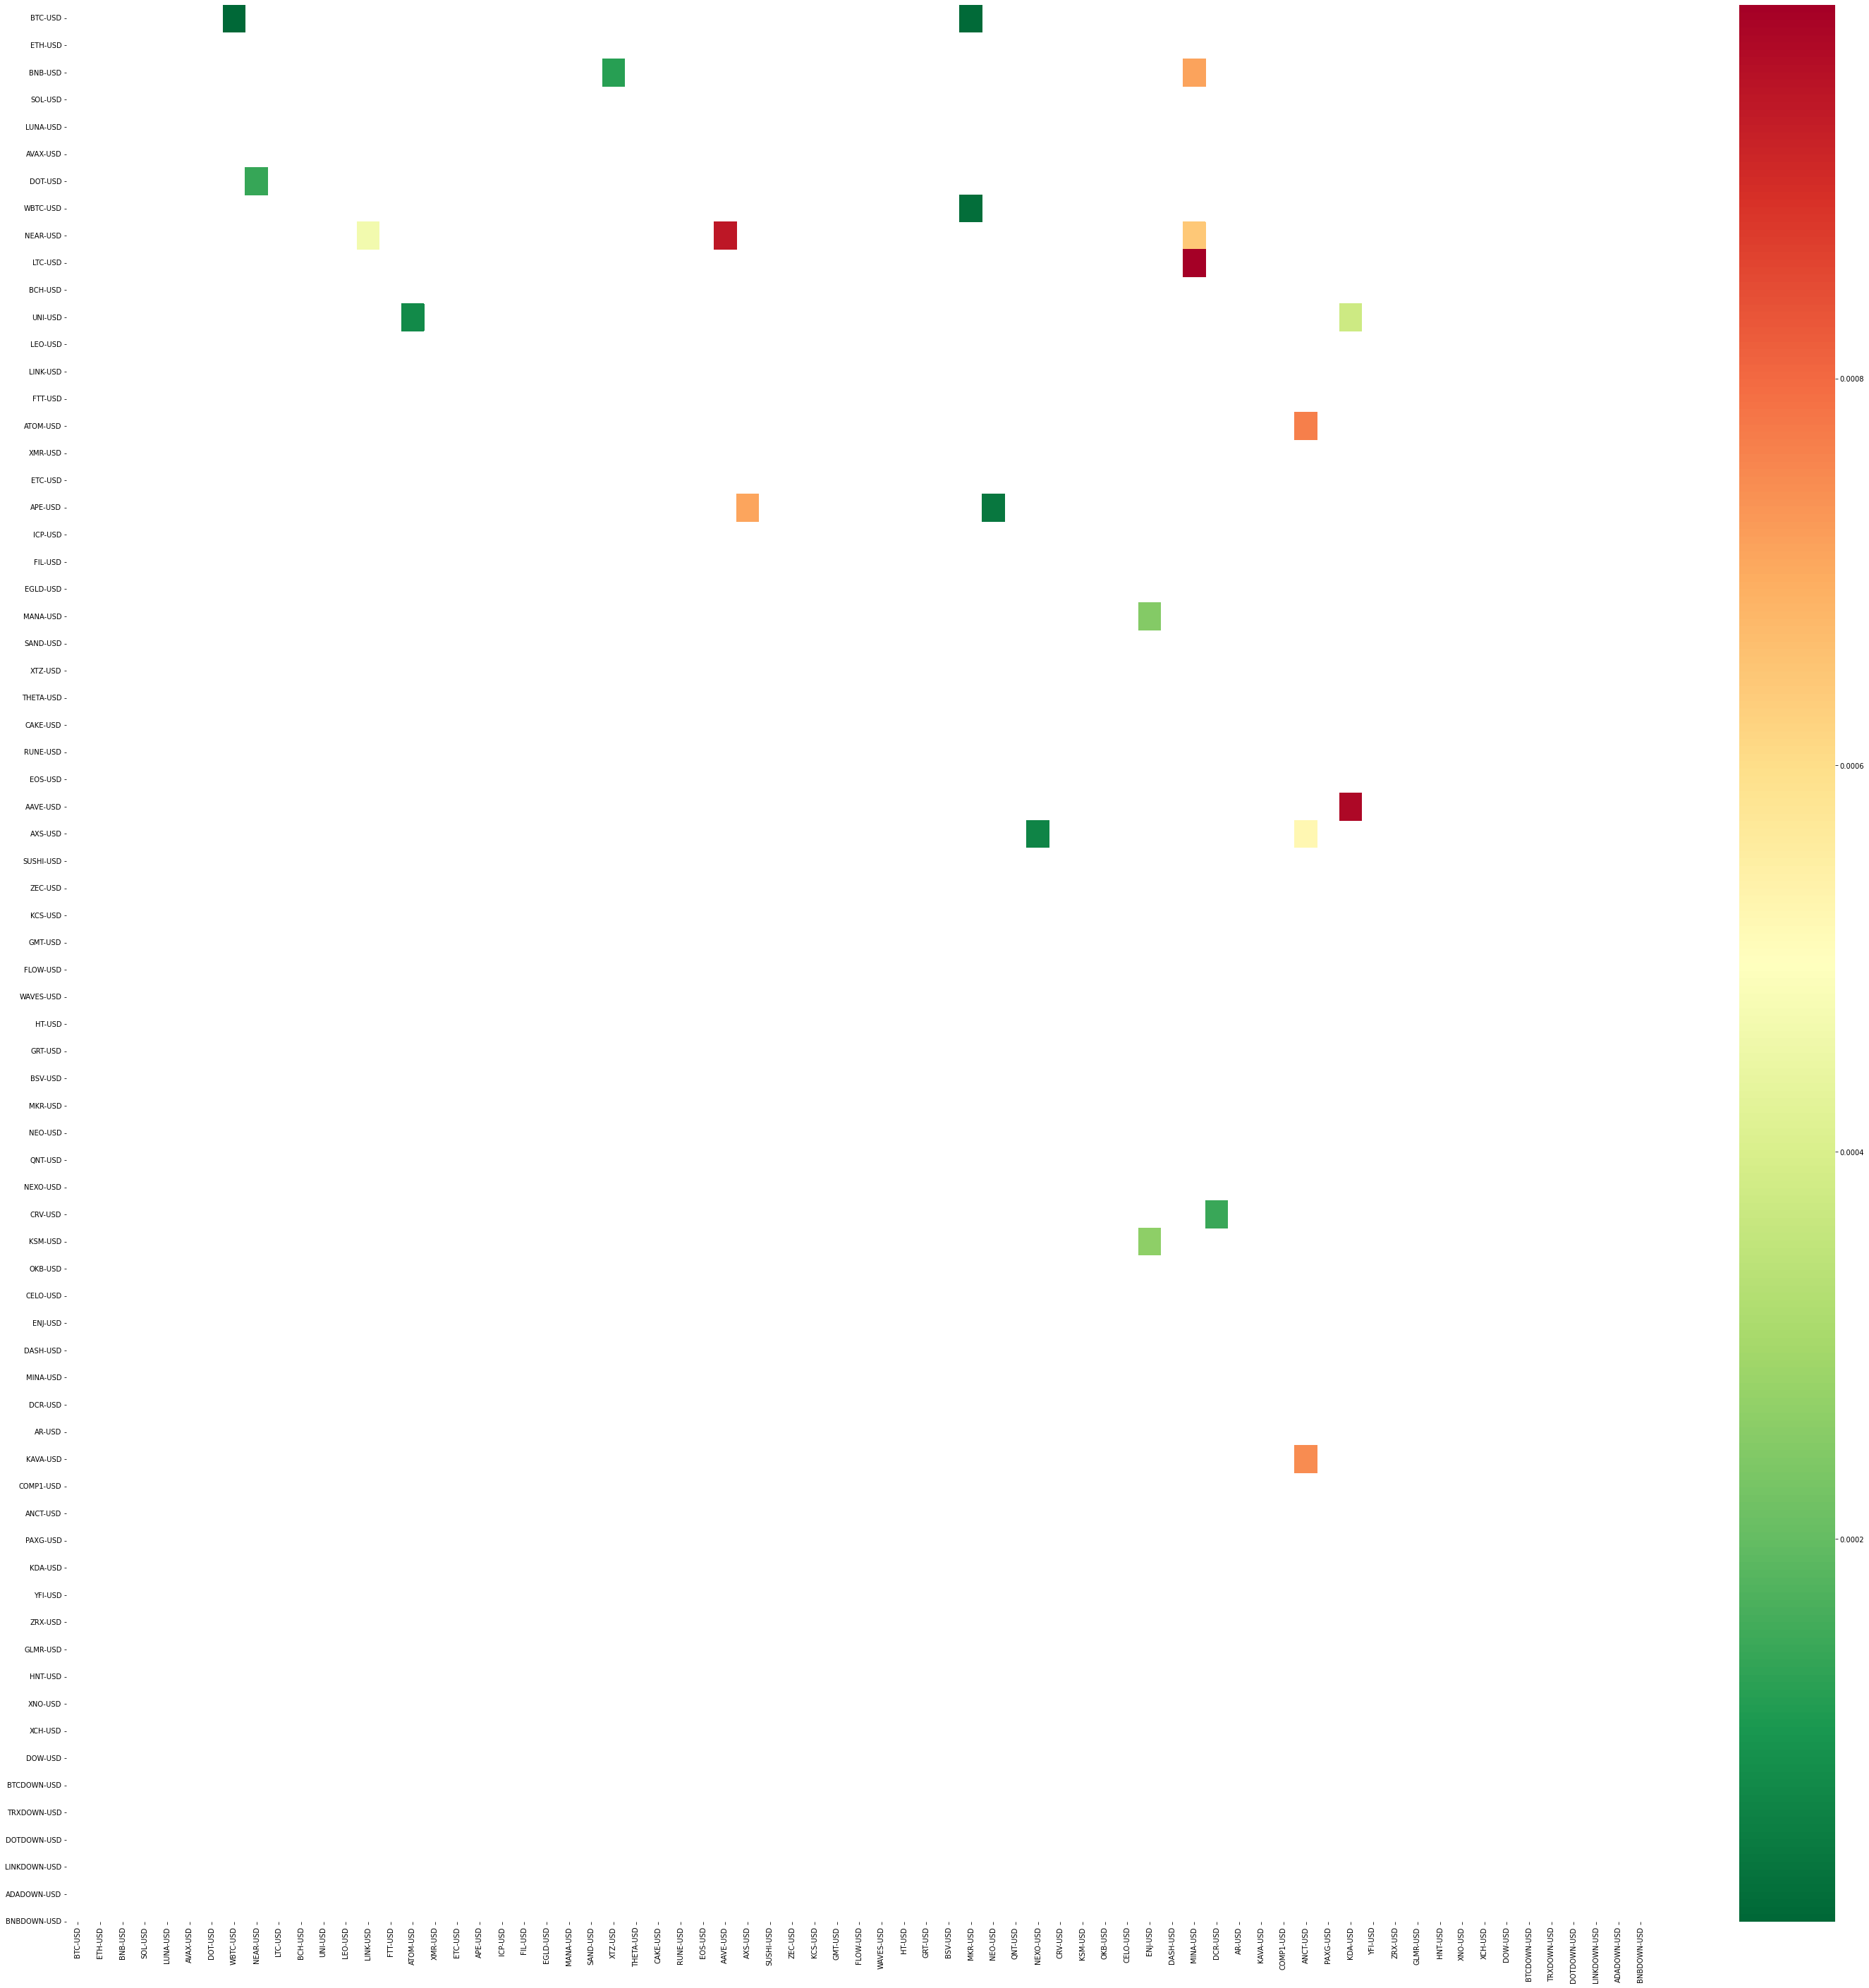

In [244]:
scores, pvalues, pairs = find_cointegrated_pairs(portfolio_naoest)
import seaborn
fig, ax = plt.subplots(figsize=(50,50))
seaborn.heatmap(pvalues, xticklabels=symbols, yticklabels=symbols, cmap='RdYlGn_r' 
                , mask = (pvalues >= 0.001)
                )
print(pairs)

In [245]:
# quantidade de pares
print(np.size(pairs))
# mostra os pares cointegrados
print(pairs)

44
[('BTC-USD', 'WBTC-USD'), ('BTC-USD', 'NEXO-USD'), ('BNB-USD', 'THETA-USD'), ('BNB-USD', 'KAVA-USD'), ('DOT-USD', 'NEAR-USD'), ('WBTC-USD', 'NEXO-USD'), ('NEAR-USD', 'LINK-USD'), ('NEAR-USD', 'AXS-USD'), ('NEAR-USD', 'KAVA-USD'), ('LTC-USD', 'KAVA-USD'), ('UNI-USD', 'ATOM-USD'), ('UNI-USD', 'XNO-USD'), ('ATOM-USD', 'GLMR-USD'), ('ICP-USD', 'SUSHI-USD'), ('ICP-USD', 'CRV-USD'), ('SAND-USD', 'DCR-USD'), ('AXS-USD', 'XNO-USD'), ('SUSHI-USD', 'OKB-USD'), ('SUSHI-USD', 'GLMR-USD'), ('CELO-USD', 'COMP1-USD'), ('ENJ-USD', 'DCR-USD'), ('YFI-USD', 'GLMR-USD')]


In [246]:
pairs

[('BTC-USD', 'WBTC-USD'),
 ('BTC-USD', 'NEXO-USD'),
 ('BNB-USD', 'THETA-USD'),
 ('BNB-USD', 'KAVA-USD'),
 ('DOT-USD', 'NEAR-USD'),
 ('WBTC-USD', 'NEXO-USD'),
 ('NEAR-USD', 'LINK-USD'),
 ('NEAR-USD', 'AXS-USD'),
 ('NEAR-USD', 'KAVA-USD'),
 ('LTC-USD', 'KAVA-USD'),
 ('UNI-USD', 'ATOM-USD'),
 ('UNI-USD', 'XNO-USD'),
 ('ATOM-USD', 'GLMR-USD'),
 ('ICP-USD', 'SUSHI-USD'),
 ('ICP-USD', 'CRV-USD'),
 ('SAND-USD', 'DCR-USD'),
 ('AXS-USD', 'XNO-USD'),
 ('SUSHI-USD', 'OKB-USD'),
 ('SUSHI-USD', 'GLMR-USD'),
 ('CELO-USD', 'COMP1-USD'),
 ('ENJ-USD', 'DCR-USD'),
 ('YFI-USD', 'GLMR-USD')]

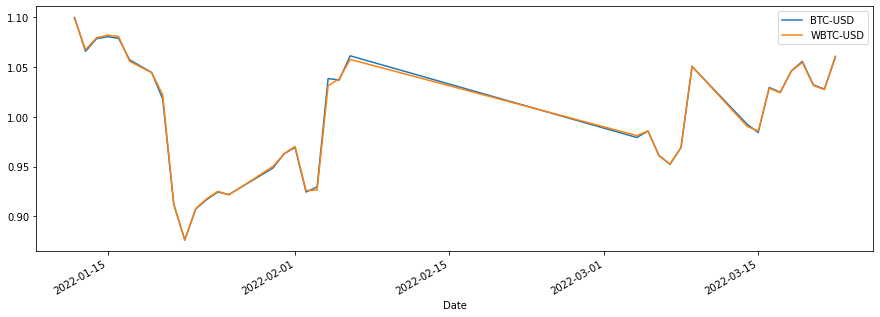

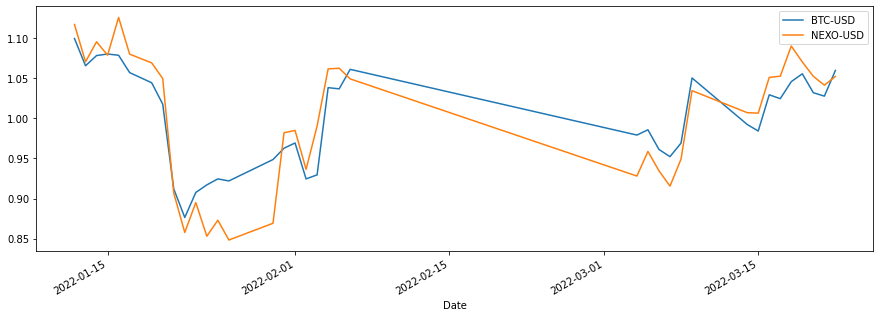

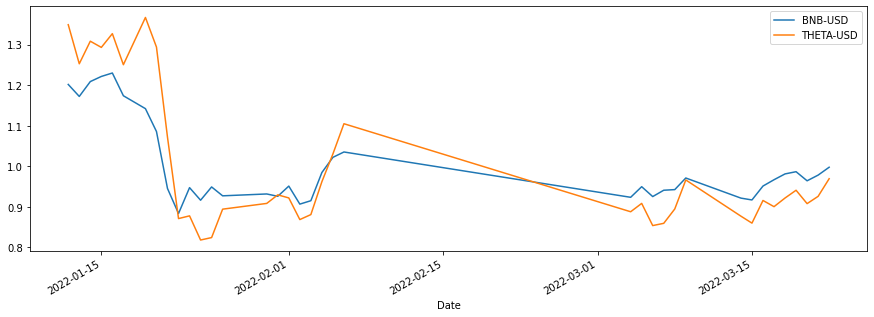

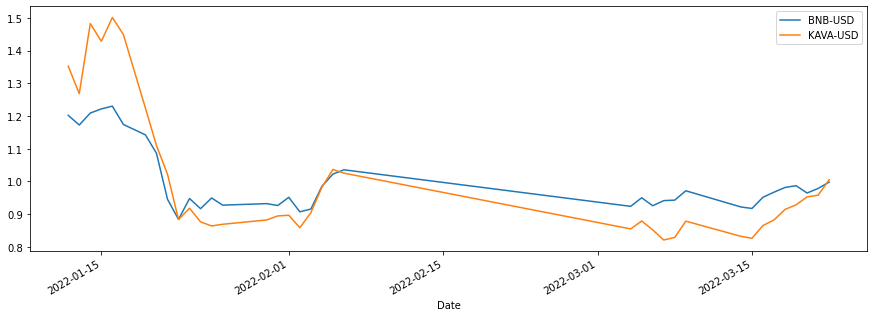

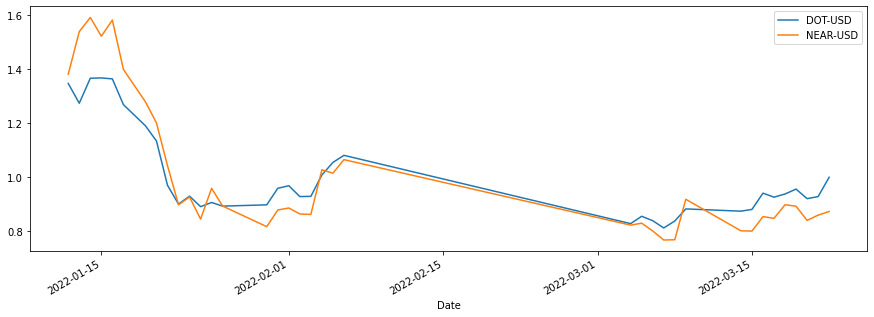

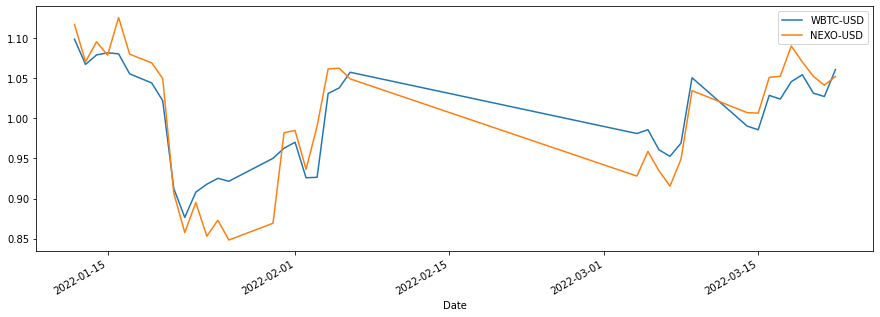

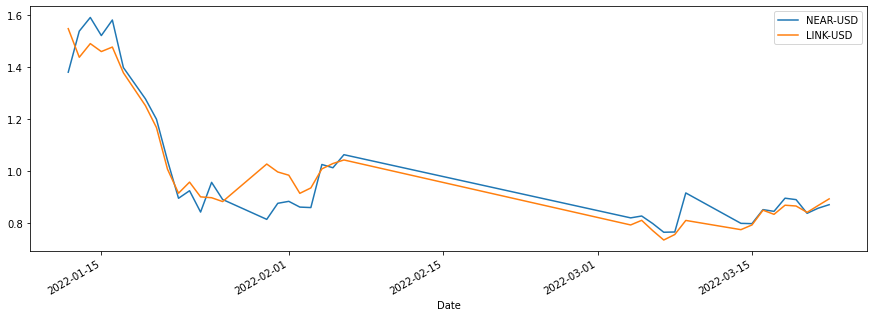

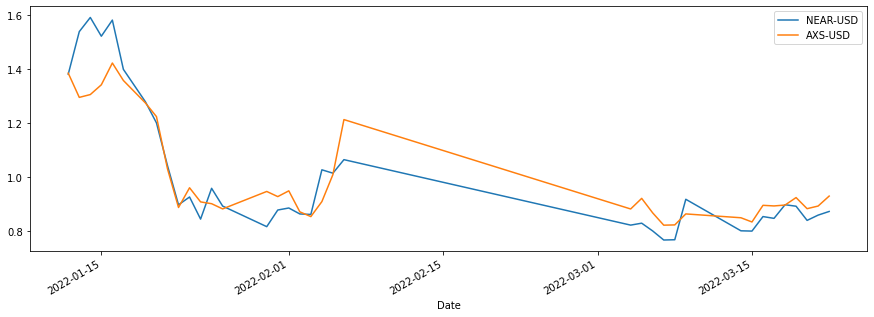

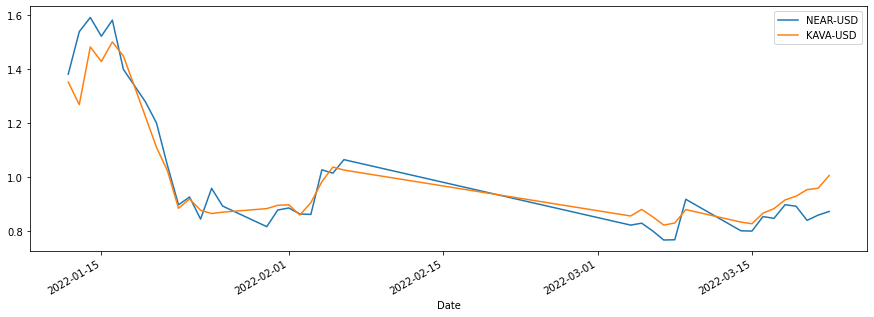

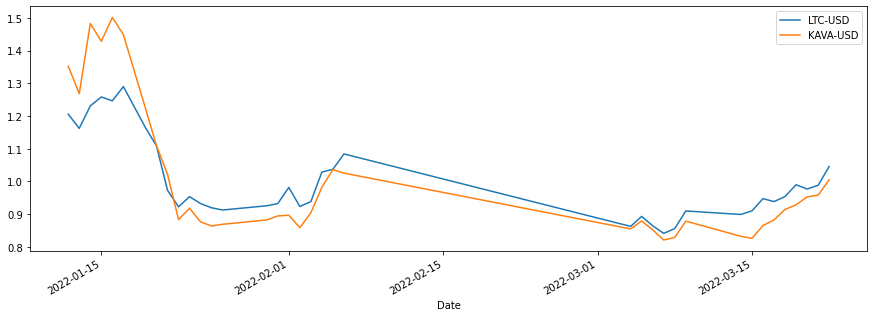

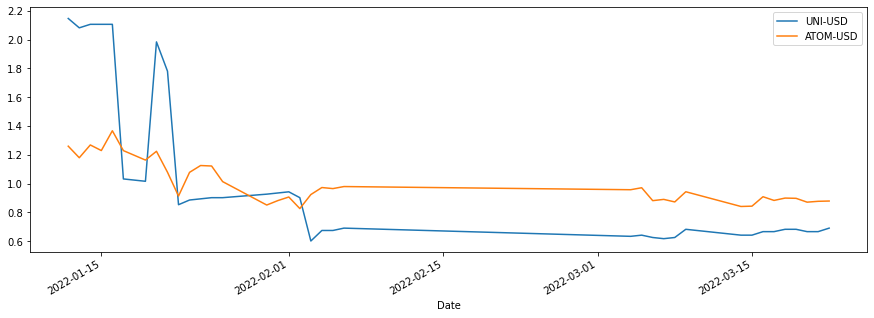

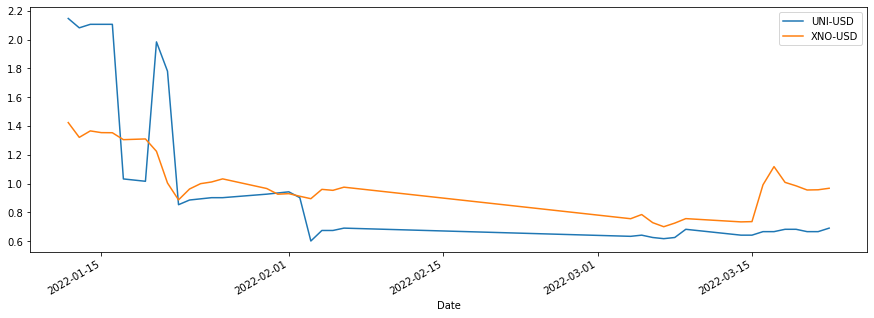

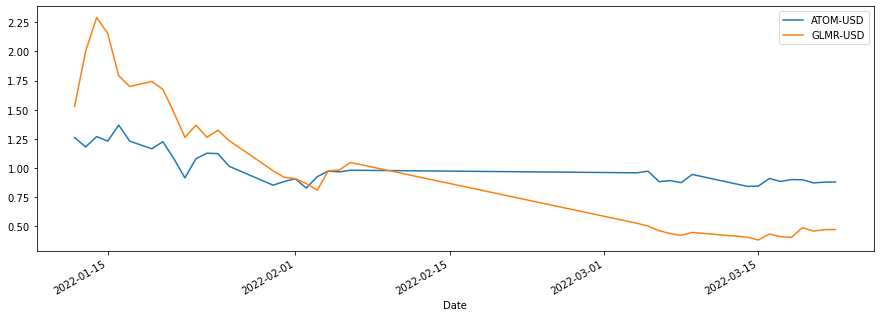

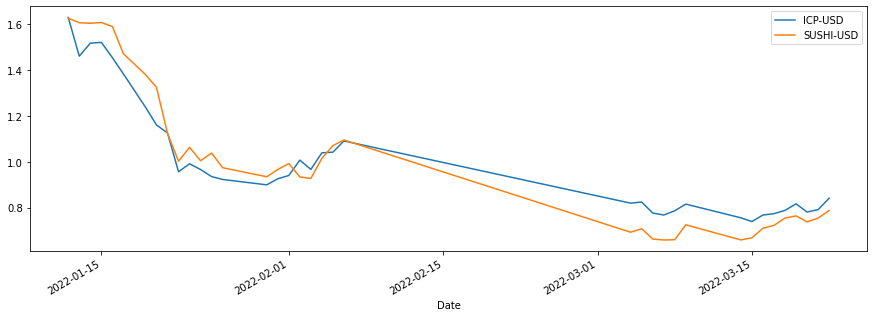

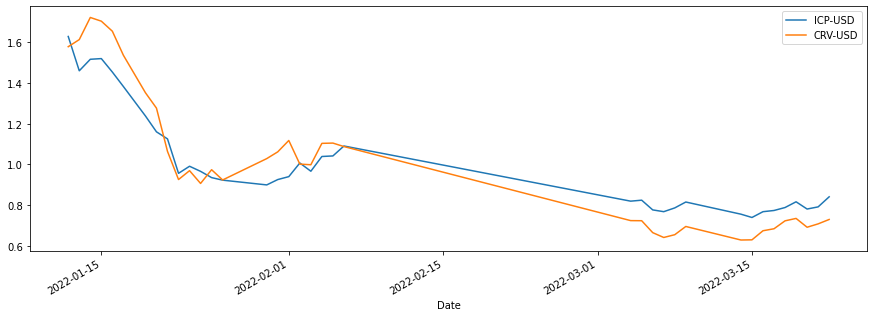

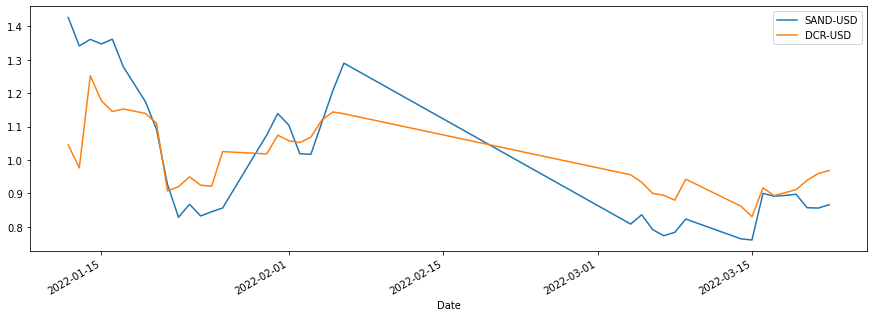

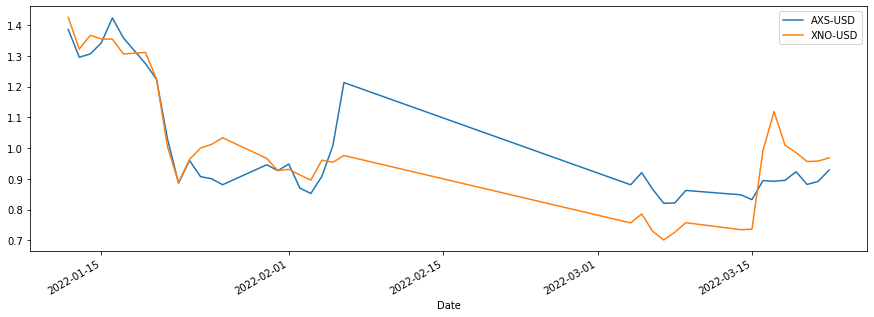

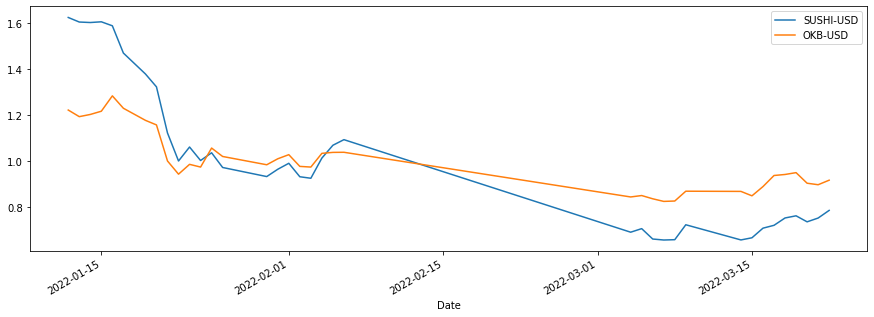

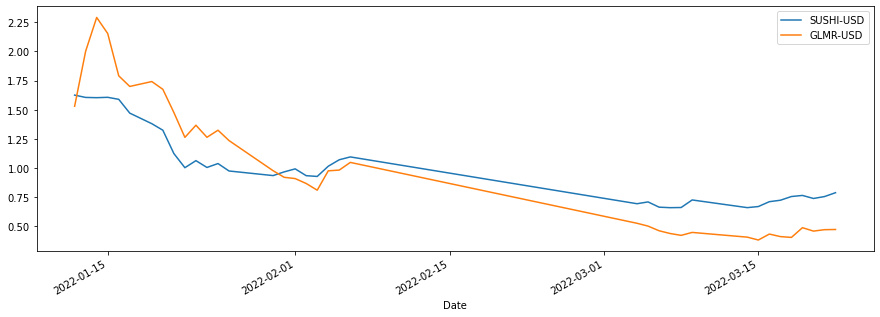

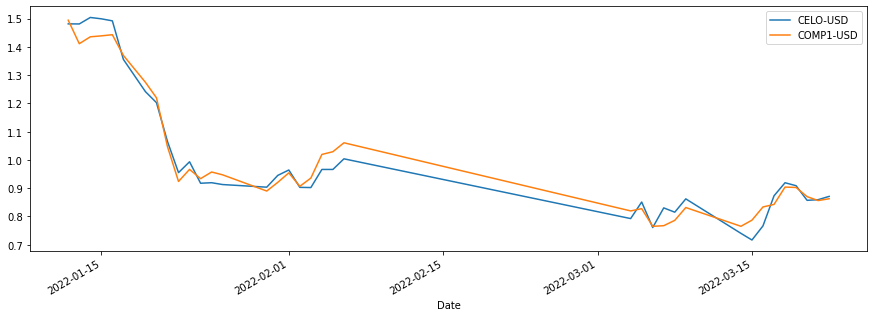

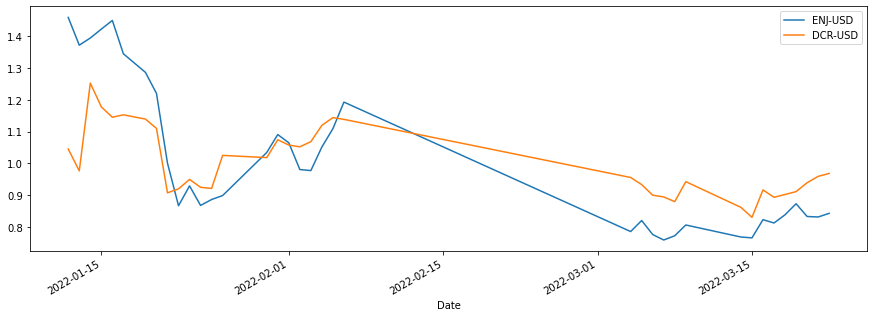

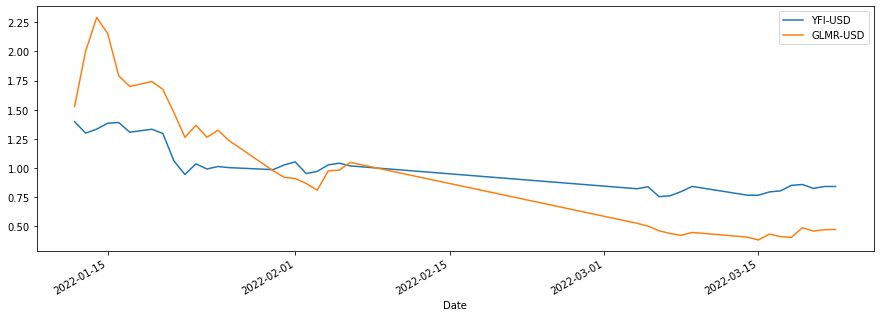

In [247]:
#plota gráfico de pares
def plotPairs(d2, par):
    (d2[par[0]]/np.mean(d2[par[0]])).plot()
    (d2[par[1]]/np.mean(d2[par[1]])).plot()
    plt.legend(par)
    plt.show()

for pair in pairs:
  plotPairs(portfolio_naoest, pair)

Calculo de Spread

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


130.62695362982168


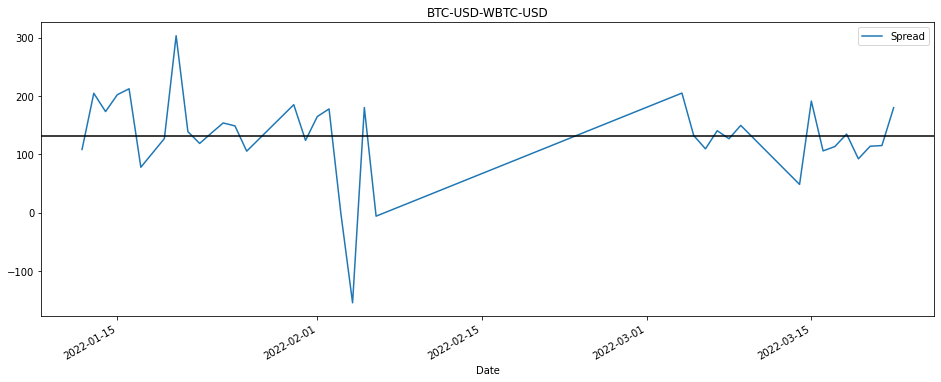

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


0.5749334234274757


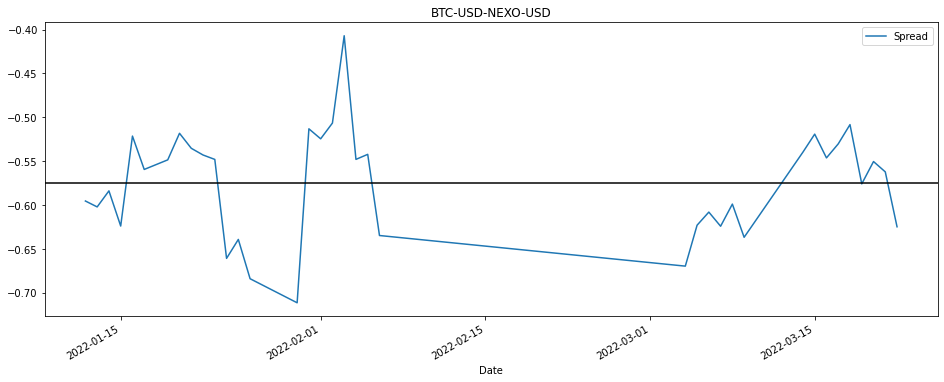

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


1.9075917319272333


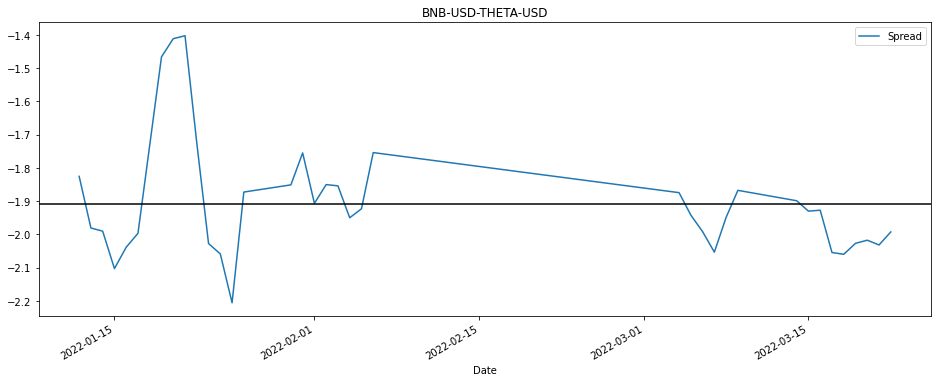

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


3.4248183154789476


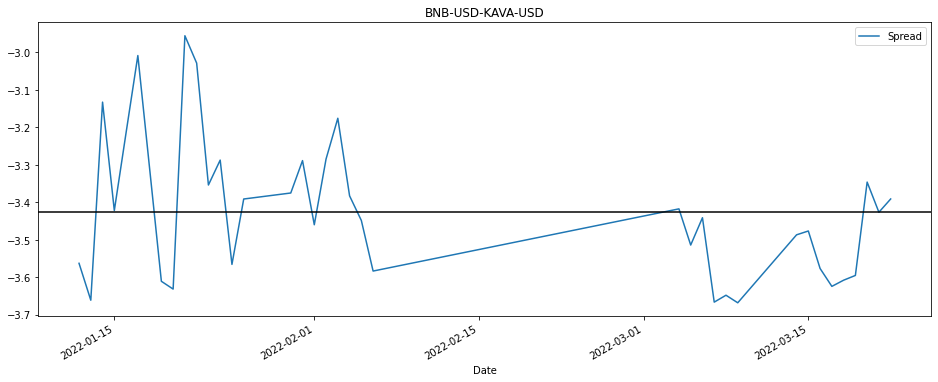

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


5.7014999628406535


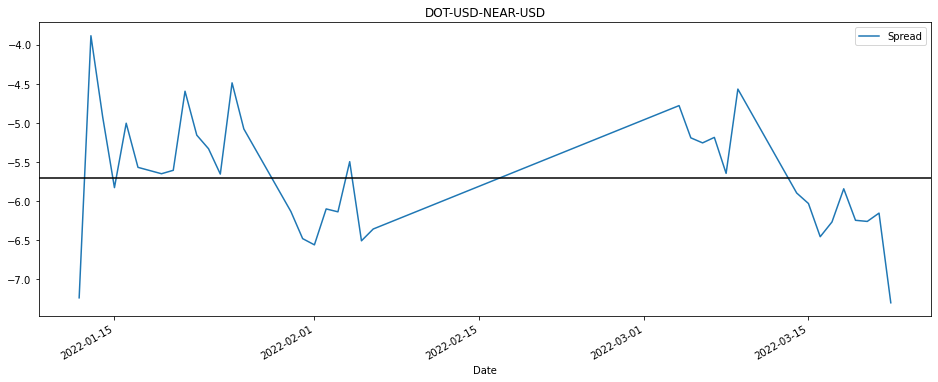

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


0.5758846985511682


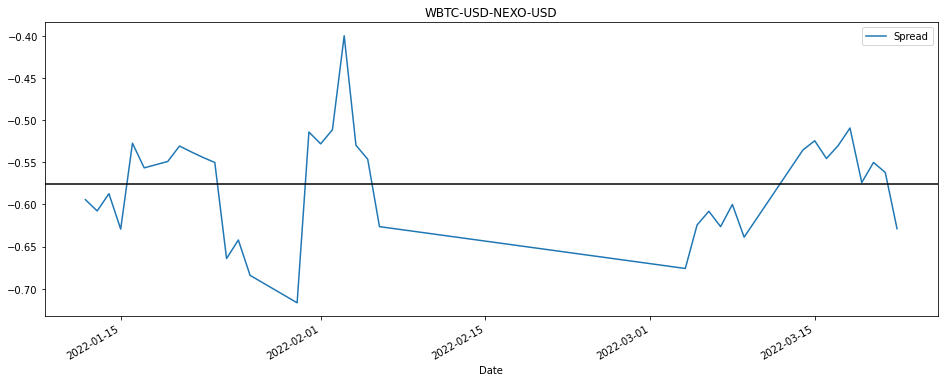

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


1.6874891652134247


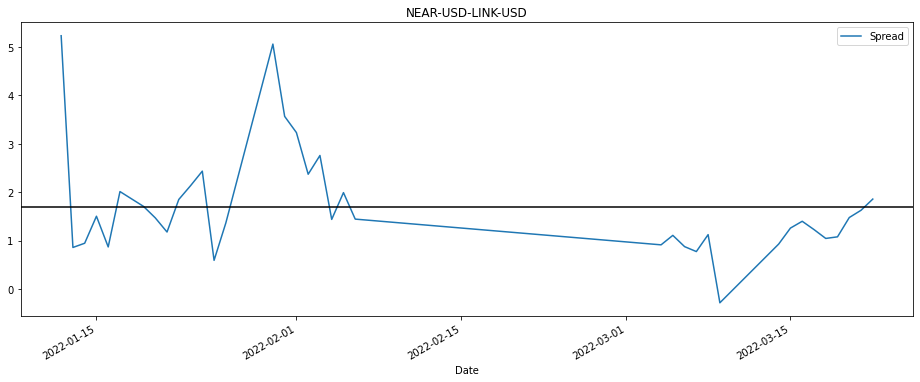

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


16.247598662274928


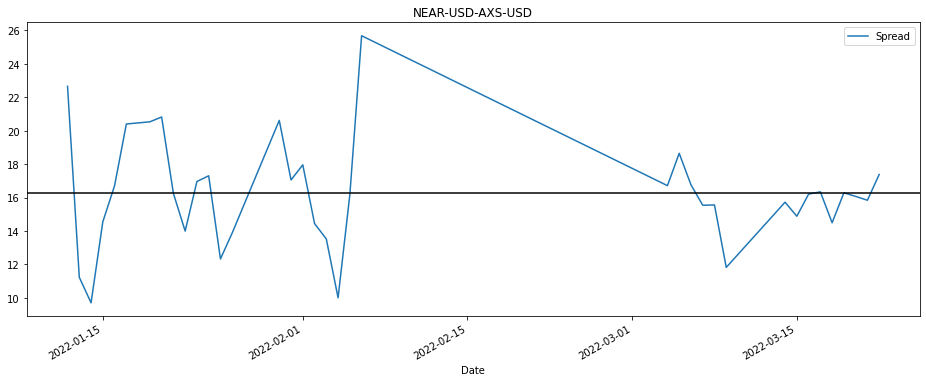

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


0.7781712950860781


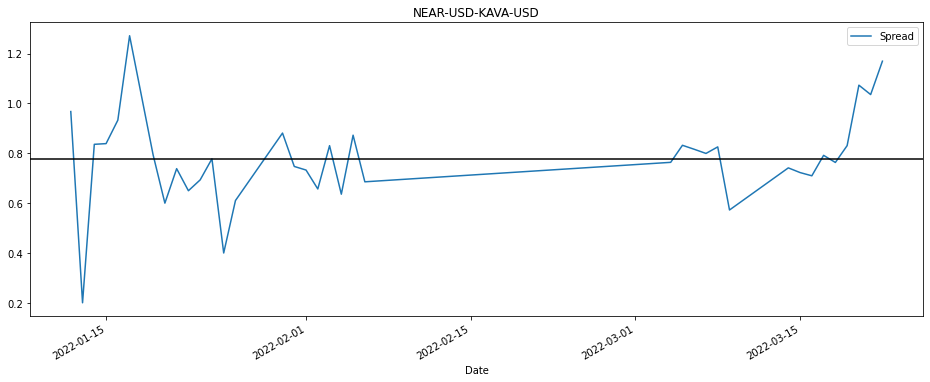

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


2.1578550326128707


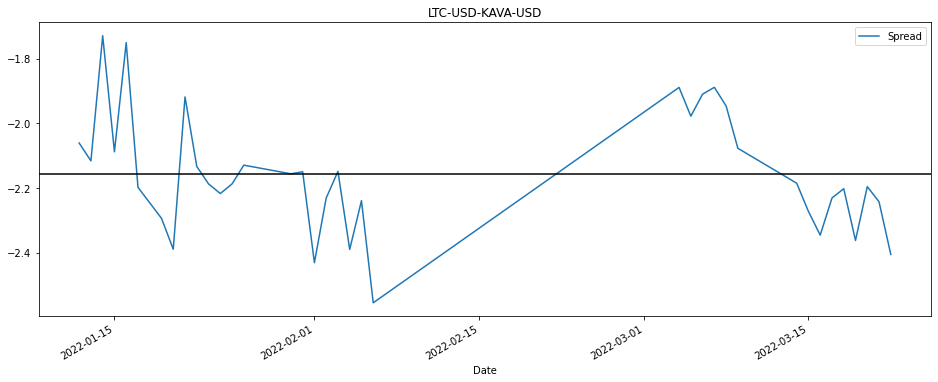

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


24.412188091392412


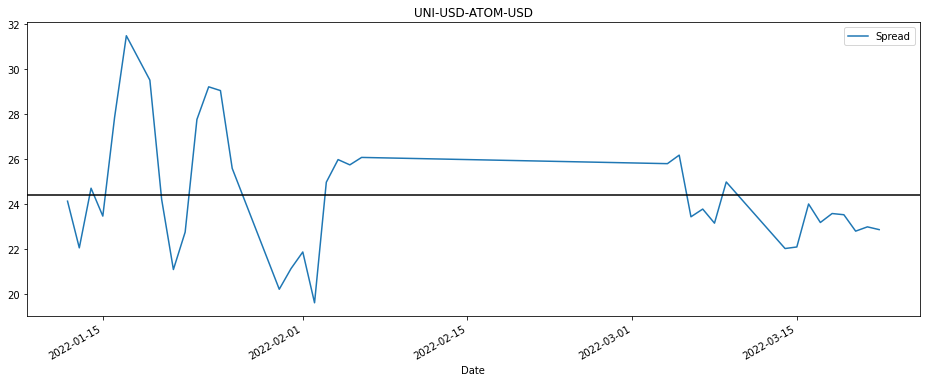

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


1.588956621591197


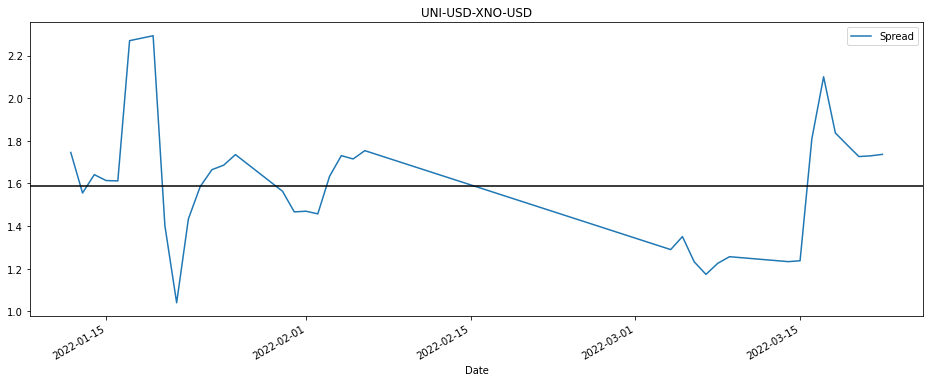

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


13.85396716322274


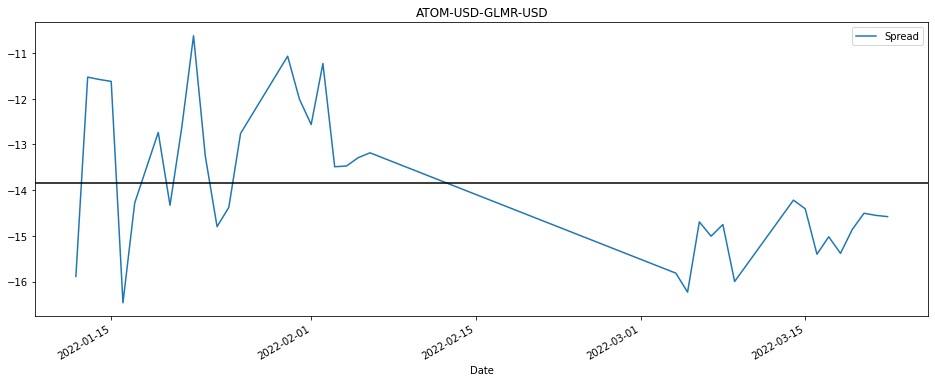

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


1.0102305211522355


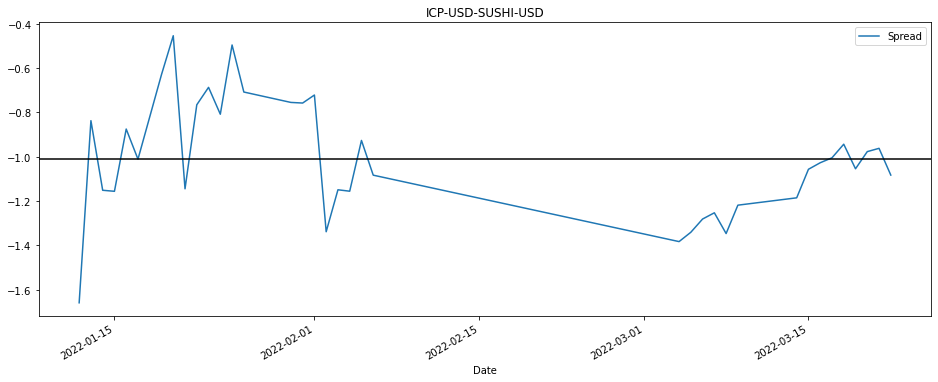

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


0.9722461491010723


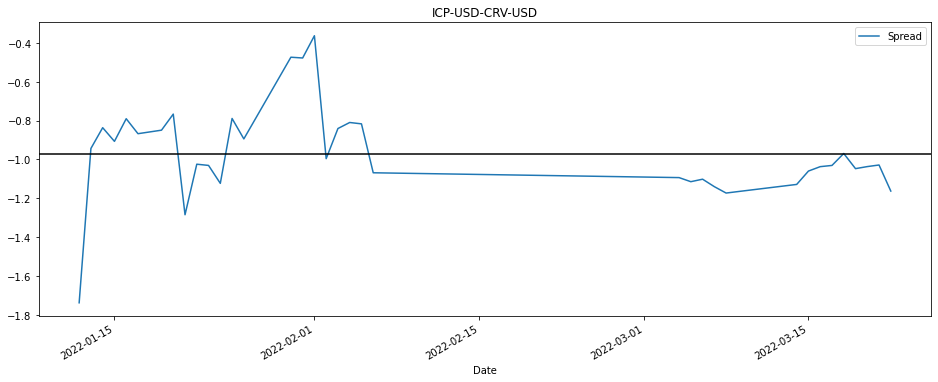

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


33.507368380968906


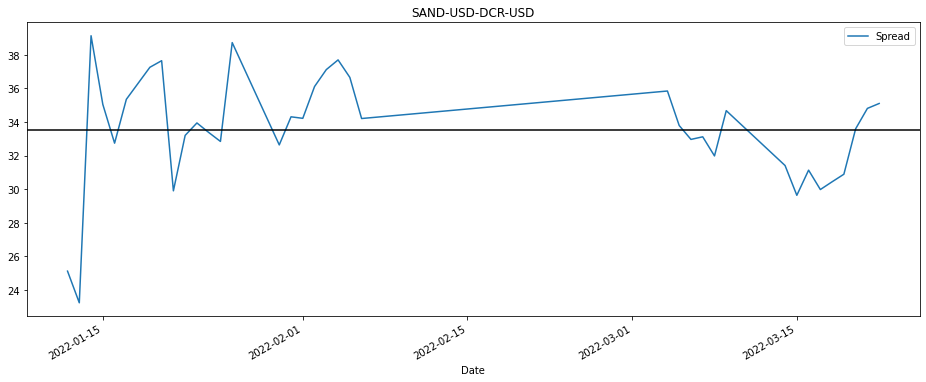

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


0.07126809339071748


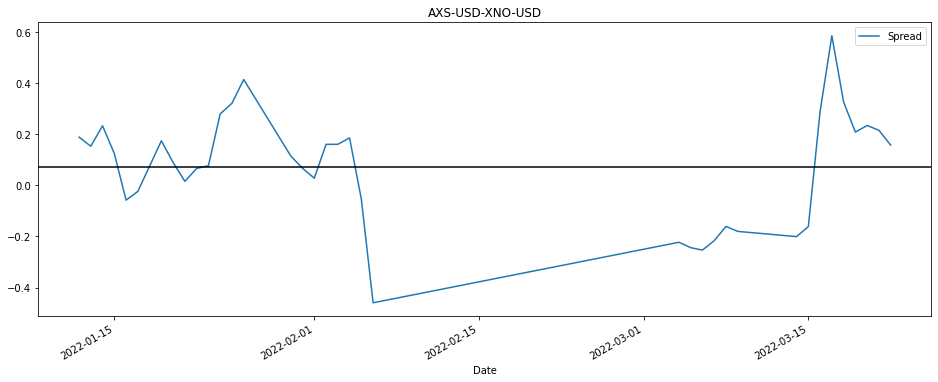

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


12.829359512887237


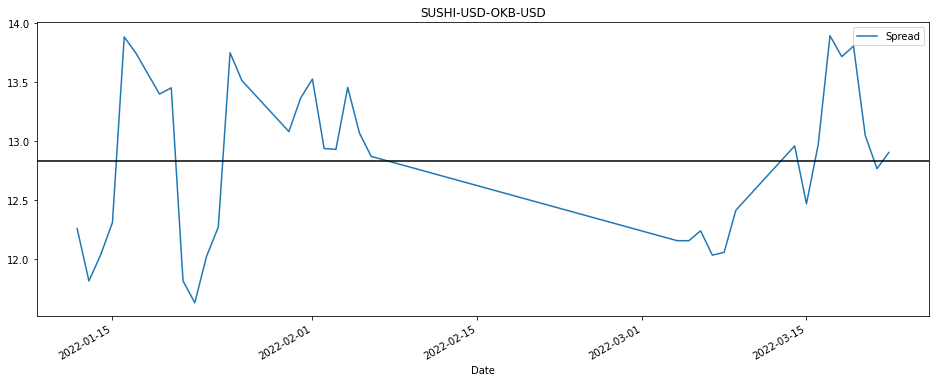

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


4.197383345150426


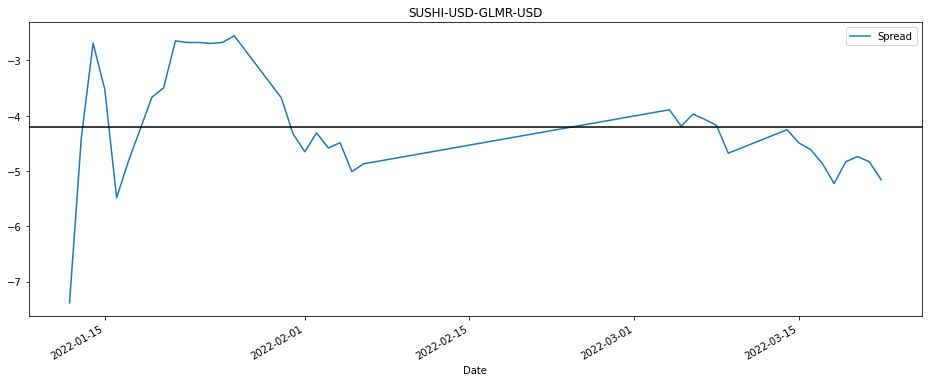

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


8.689912964953232


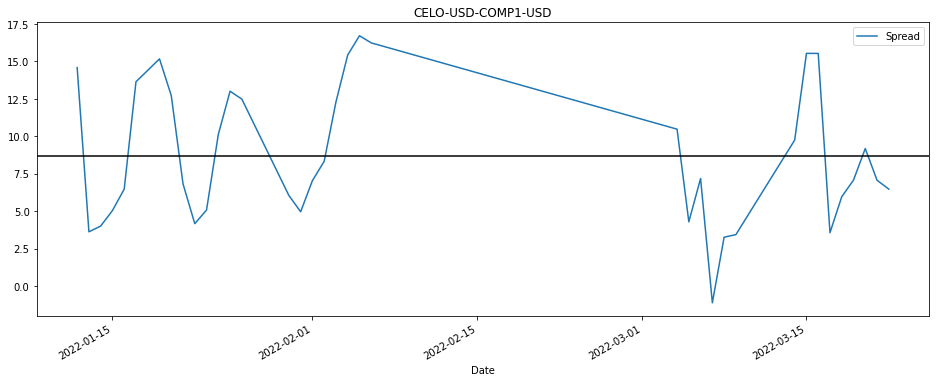

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


36.180564511609624


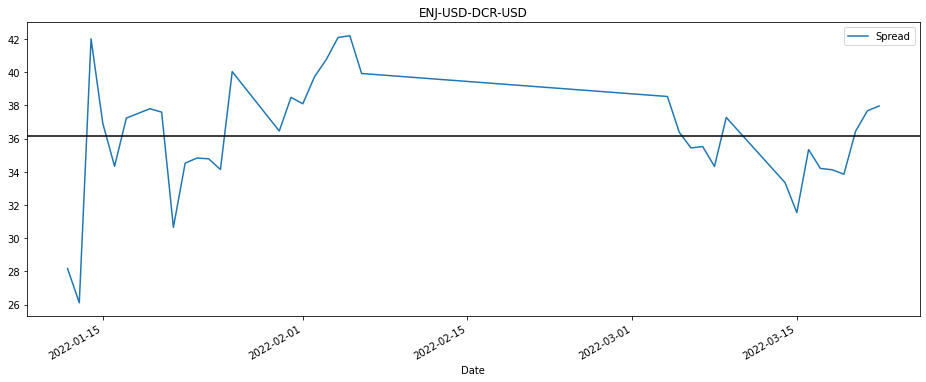

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


9.404643054031453


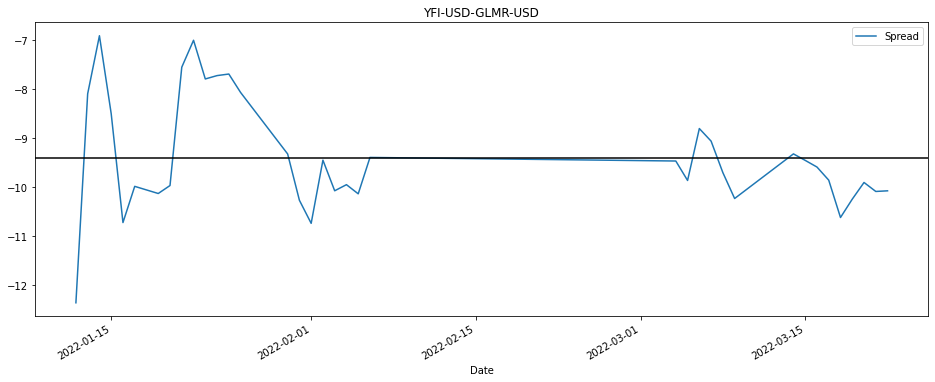

In [248]:
#plota gráficos dos Spread dos pares
def plotSpread(d2, p):
  S1 = d2[p[0]]
  S2 = d2[p[1]]
  S1 = sm.add_constant(S1)
  results = sm.OLS(S2, S1).fit()
  S1 = S1[p[0]]
  b = results.params[p[0]]

  spread = S2 - b * S1
  spread.plot(figsize=(16,6))
  plt.axhline(spread.mean(), color='black')
  plt.legend(['Spread']);
  medSpread= spread.mean()
  plt.title(str(p[0])+'-'+str(p[1]))
  print(abs(medSpread)) 
  
   
  
  plt.show() 


for pair in pairs:
  plotSpread(portfolio_naoest, pair)

Calculando o Ratio

P-valor = 2.1006405266148317e-06
Score = 5.947962488107675
Ratios = 1.0004307226307172


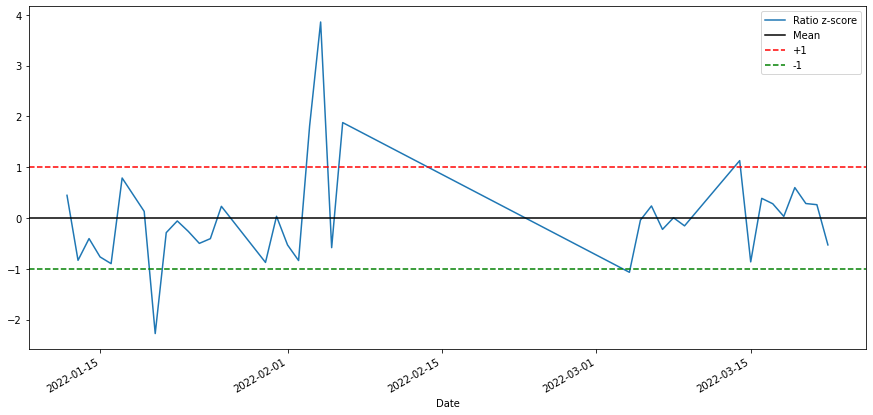

P-valor = 7.170420496903141e-06
Score = 5.694949808919924
Ratios = 19140.615451105907


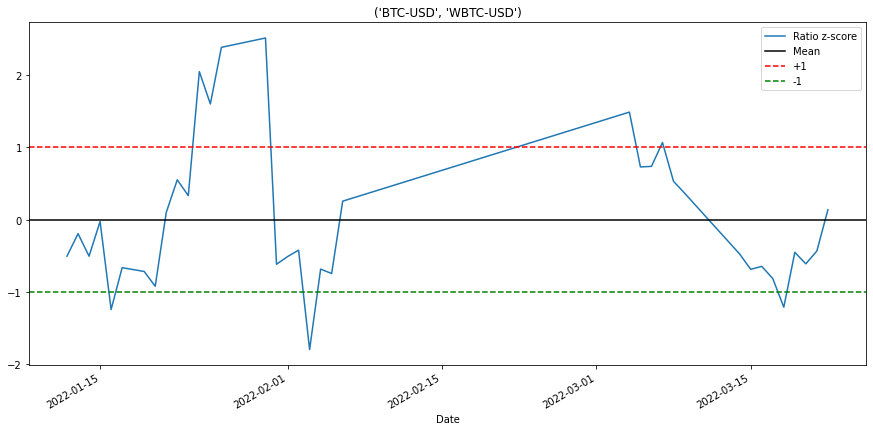

P-valor = 0.00011895518451690194
Score = 5.0761988729069465
Ratios = 129.32408283343494


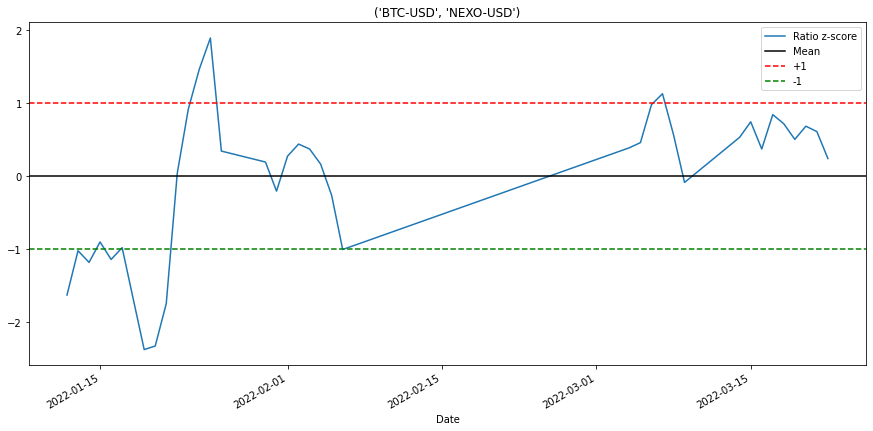

P-valor = 0.0007111573556314875
Score = 4.641155554491333
Ratios = 111.97274841364907


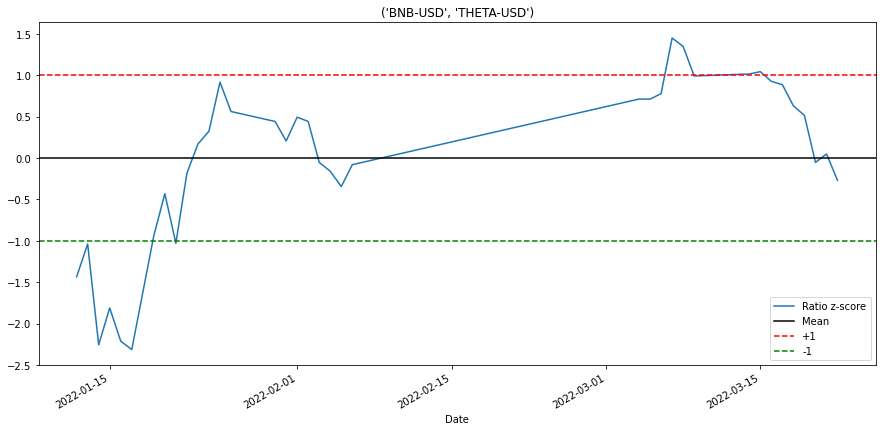

P-valor = 0.0001408099603729958
Score = 5.0368000497400764
Ratios = 1.626007183536066


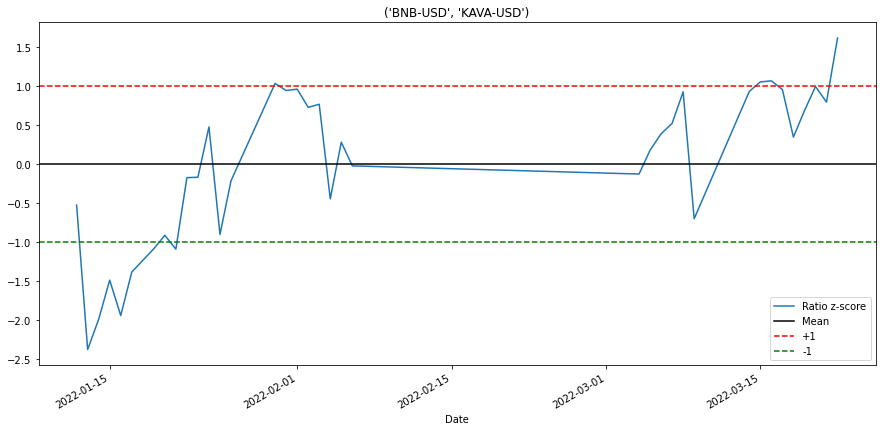

P-valor = 1.431482578781218e-05
Score = 5.548355425860664
Ratios = 19132.702089139693


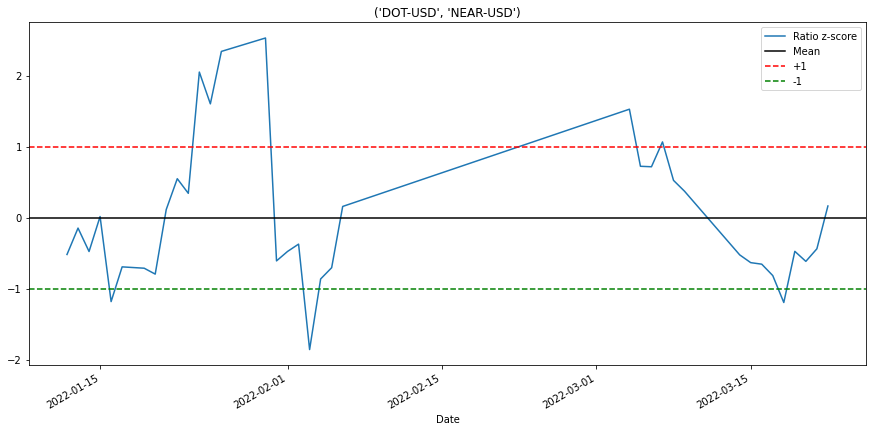

P-valor = 0.0004639268169919281
Score = 4.748872010356997
Ratios = 0.7337583425432641


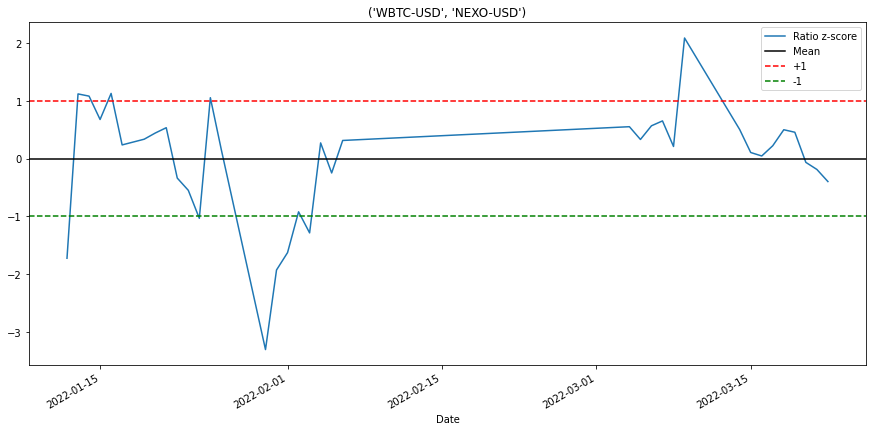

P-valor = 0.0009465370899782018
Score = 4.567508153058782
Ratios = 0.2231530333994273


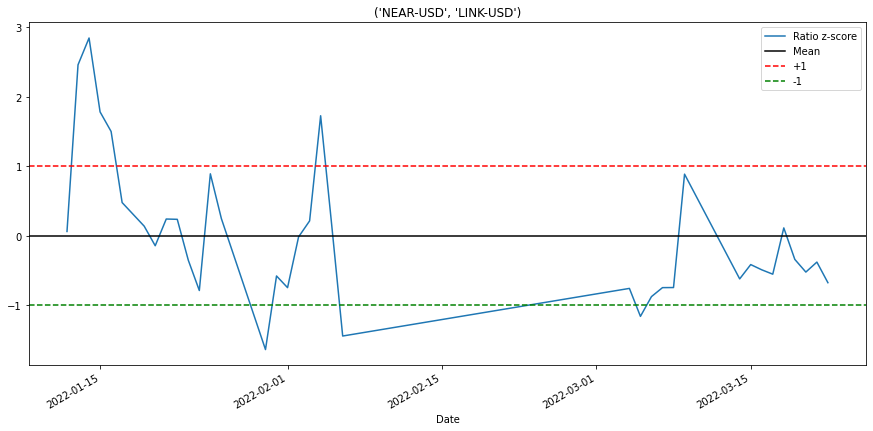

P-valor = 0.0006410514063690764
Score = 4.667573452303953
Ratios = 3.4249570665172606


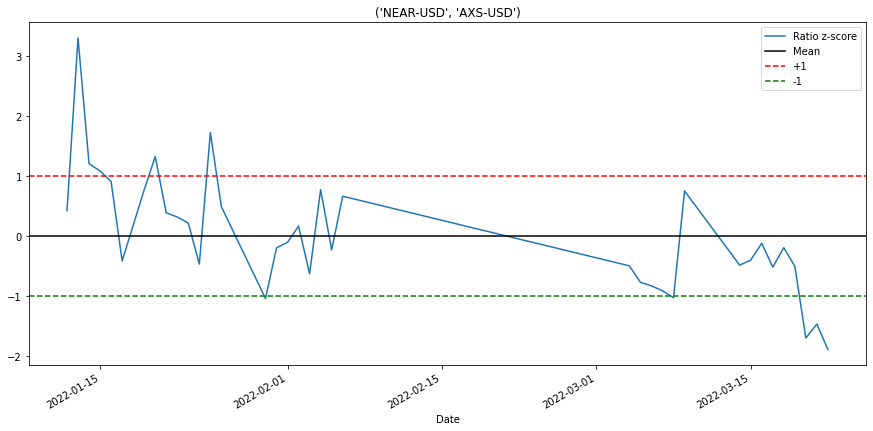

P-valor = 0.0009932718945049874
Score = 4.554964081564397
Ratios = 32.364513126331964


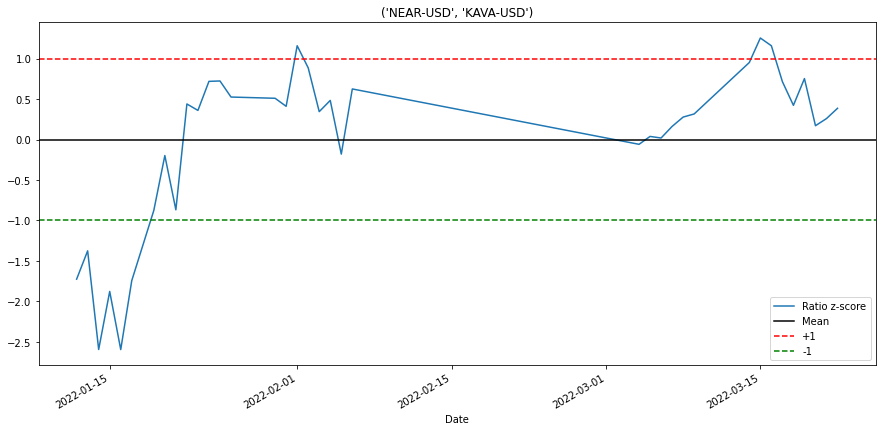

P-valor = 7.20623126740305e-05
Score = 5.1915638633782555
Ratios = 3.715118922229313e-06


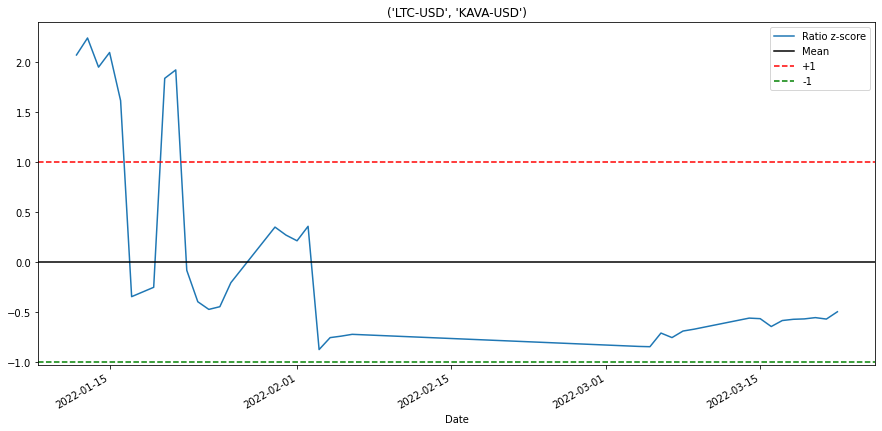

P-valor = 0.0003771457379864385
Score = 4.80016504787982
Ratios = 5.1405482641928275e-05


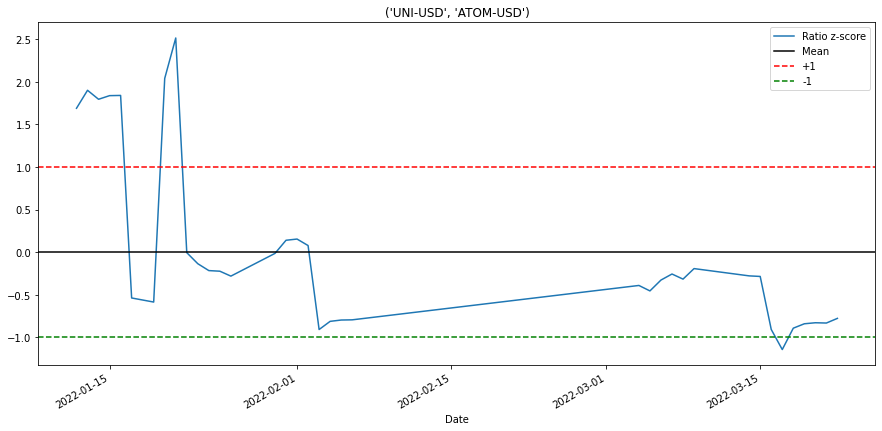

P-valor = 0.000766334347039868
Score = 4.6220324053806365
Ratios = 7.086124881642807


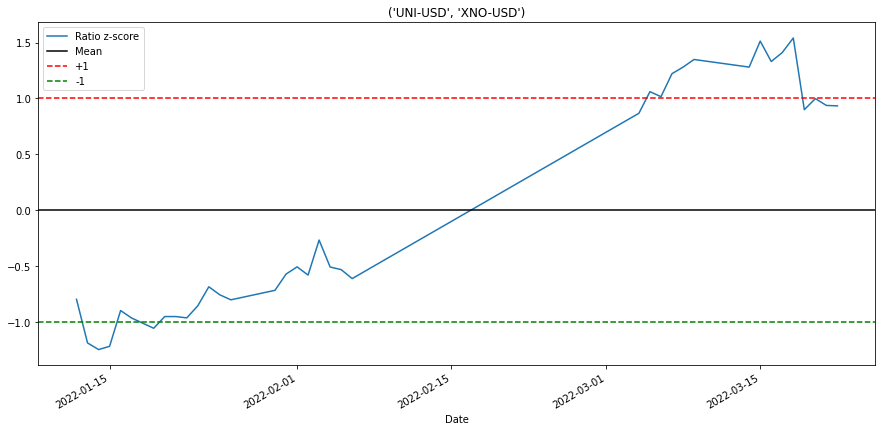

P-valor = 0.0007073895328529482
Score = 4.6425117499771185
Ratios = 5.000496390379949


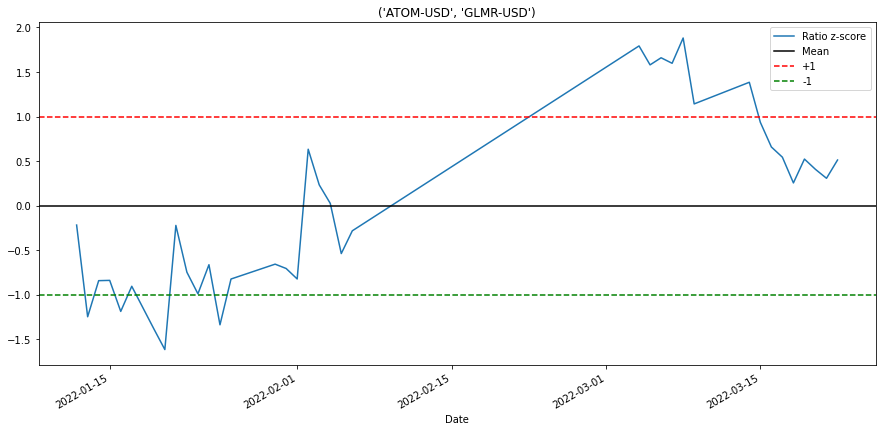

P-valor = 3.5147374417332324e-05
Score = 5.352722041924893
Ratios = 7.119112221596788


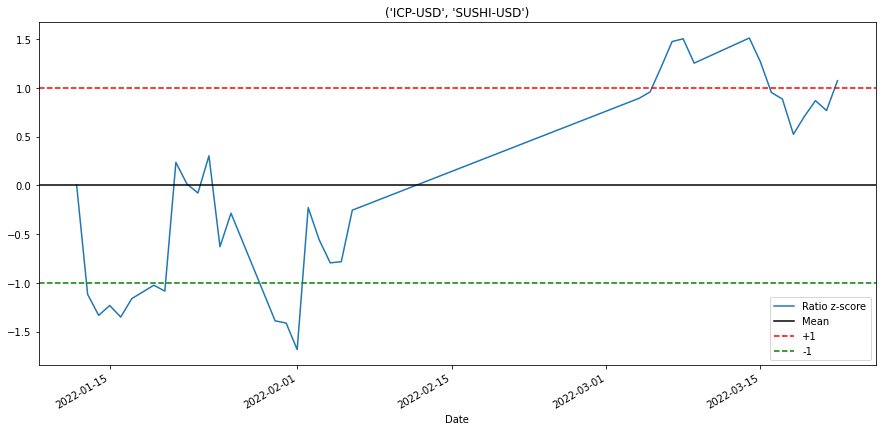

P-valor = 0.0002497196608677224
Score = 4.900610967491234
Ratios = 0.06013028567696957


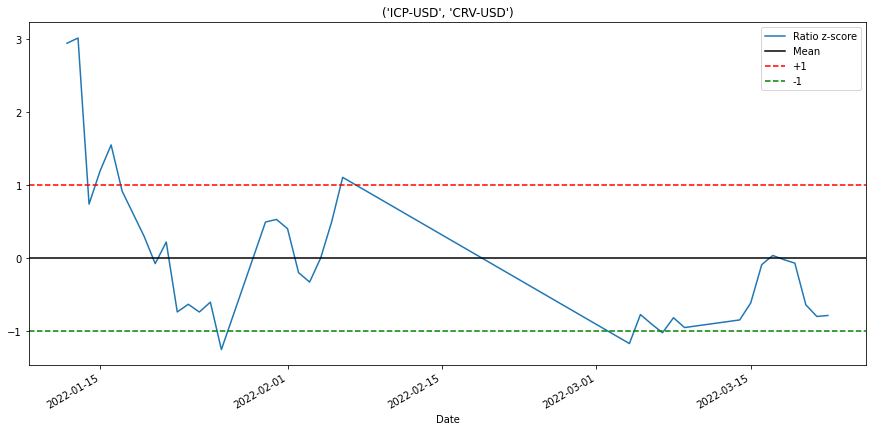

P-valor = 0.0009744447612287056
Score = 4.559949589143884
Ratios = 24.714697748482372


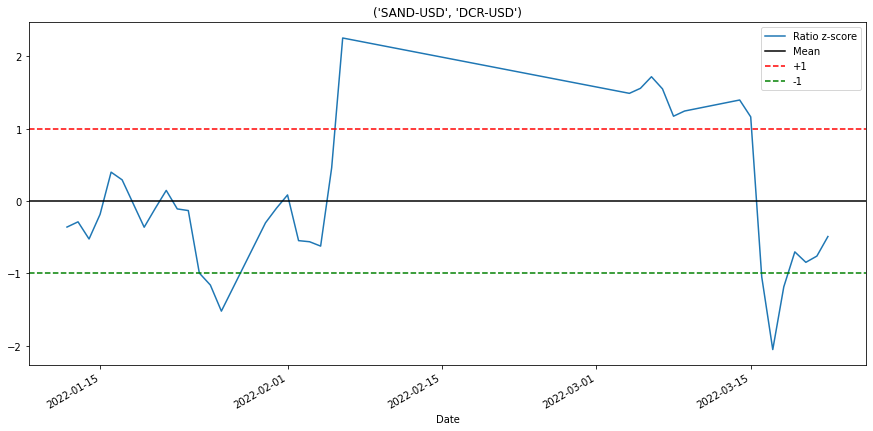

P-valor = 6.0234544788614584e-05
Score = 5.232239585916232
Ratios = 0.20067432192085946


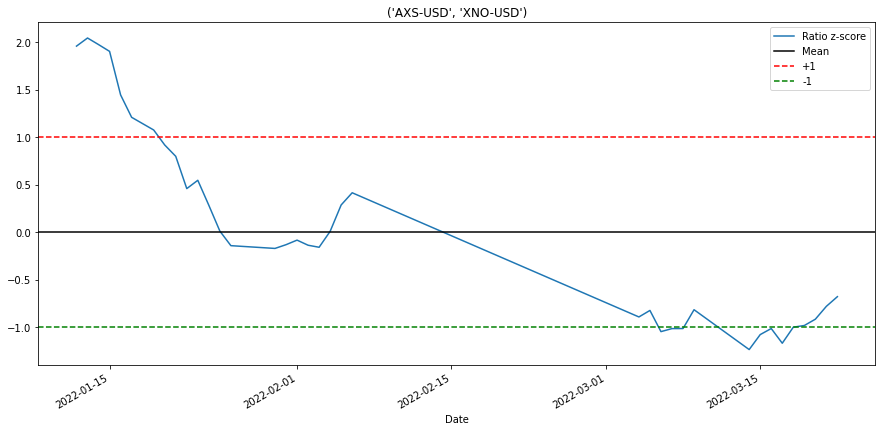

P-valor = 0.0005247567625894439
Score = 4.7180748748154
Ratios = 0.8843186750314268


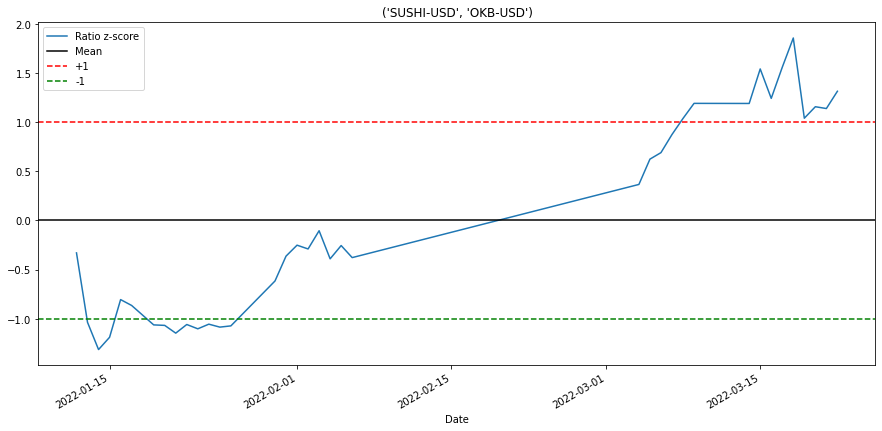

P-valor = 0.00014471730830376234
Score = 5.030377678768579
Ratios = 0.025269290537867542


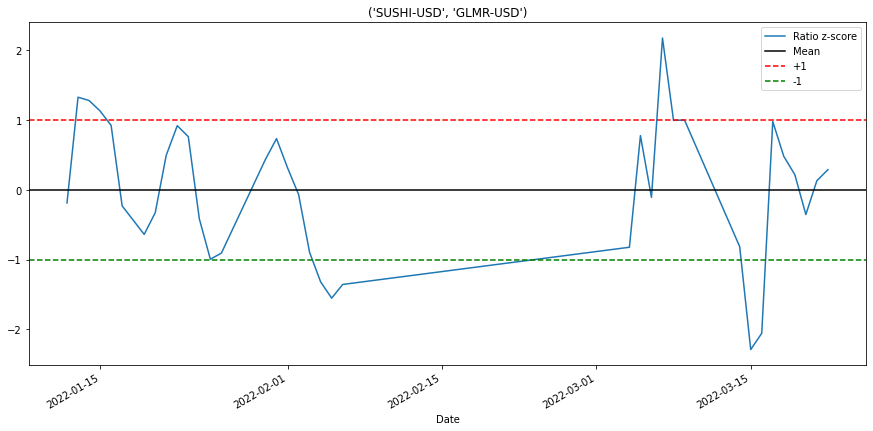

P-valor = 0.00026496762137827475
Score = 4.886302830597396
Ratios = 0.028848900730884385


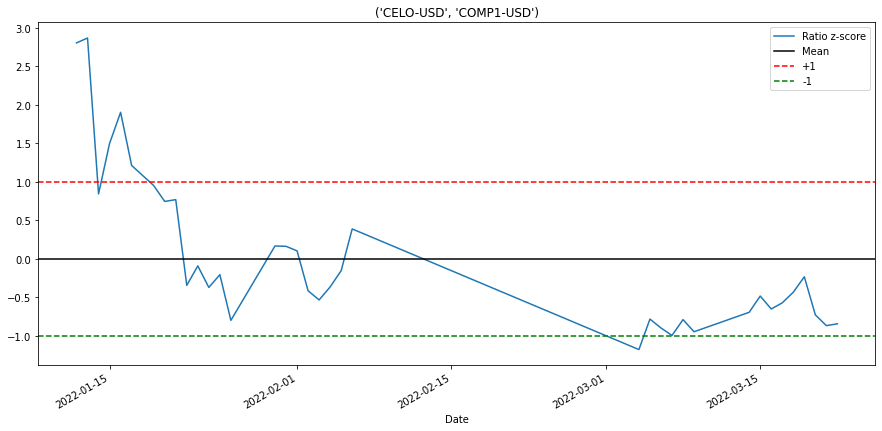

P-valor = 0.0007474109981747096
Score = 4.628440753058275
Ratios = 5175.259524714456


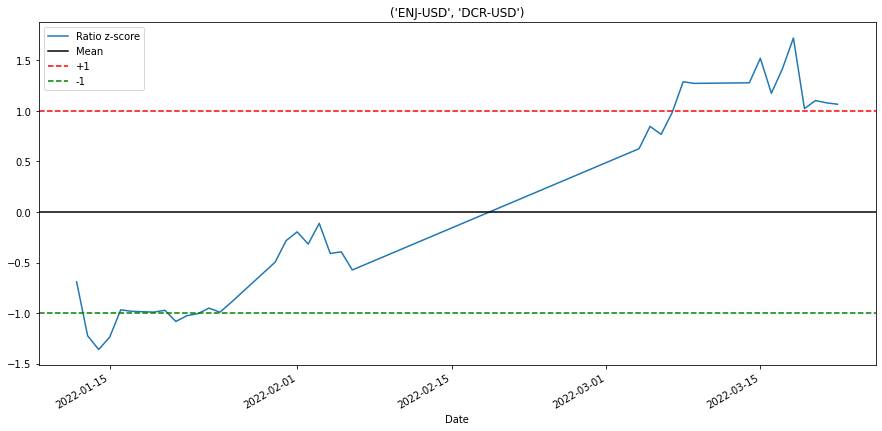

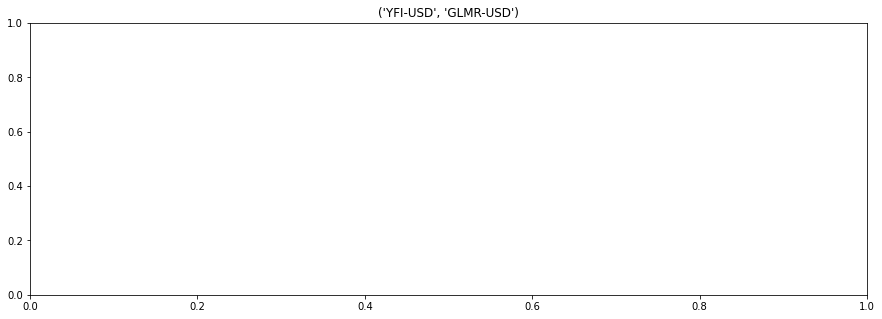

In [249]:
#plota gráfico de ratios
def plotPairsRatios(d2, par):
    desenhaRatio(portfolio_naoest,pair)
    plt.title(pair)
    
   

for pair in pairs:
  plotPairsRatios(portfolio_naoest, pair)
  
   

Estratégia de Negociação

In [273]:
#pegando cada par
data = portfolio_naoest.dropna().copy()

ratios = data.loc[:, 'WBTC-USD']/ data.loc[:, 'NEXO-USD']

print(len(ratios))

train = ratios

37


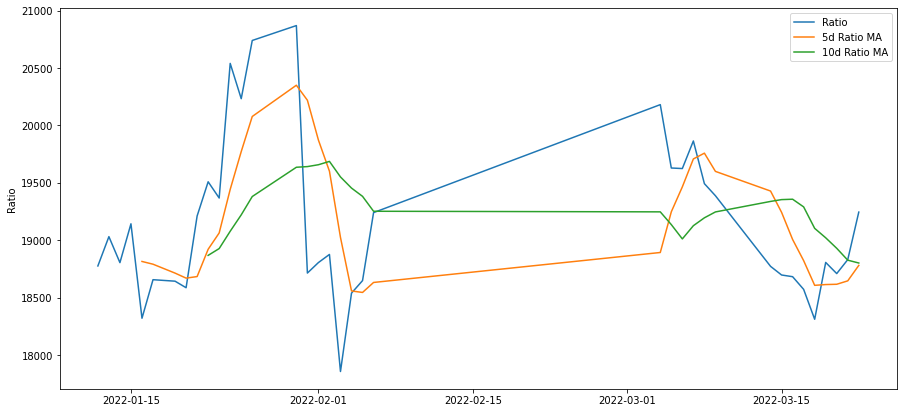

In [303]:
#suavização usando média de 5 e 10 dias(o intervalo varia a depender do par de ativos)
ratios_mavg5 = train.rolling(window=5,center=False).mean()

ratios_mavg60 = train.rolling(window=10, center=False).mean()

std_60 = train.rolling(window=5, center=False).std()

zscore_60_5=(ratios_mavg5-ratios_mavg60)/std_60

plt.figure(figsize=(15,7))
plt.plot(train.index, train.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg60.index, ratios_mavg60.values)

plt.legend(['Ratio', '5d Ratio MA', '10d Ratio MA'])

plt.ylabel('Ratio')
plt.show()

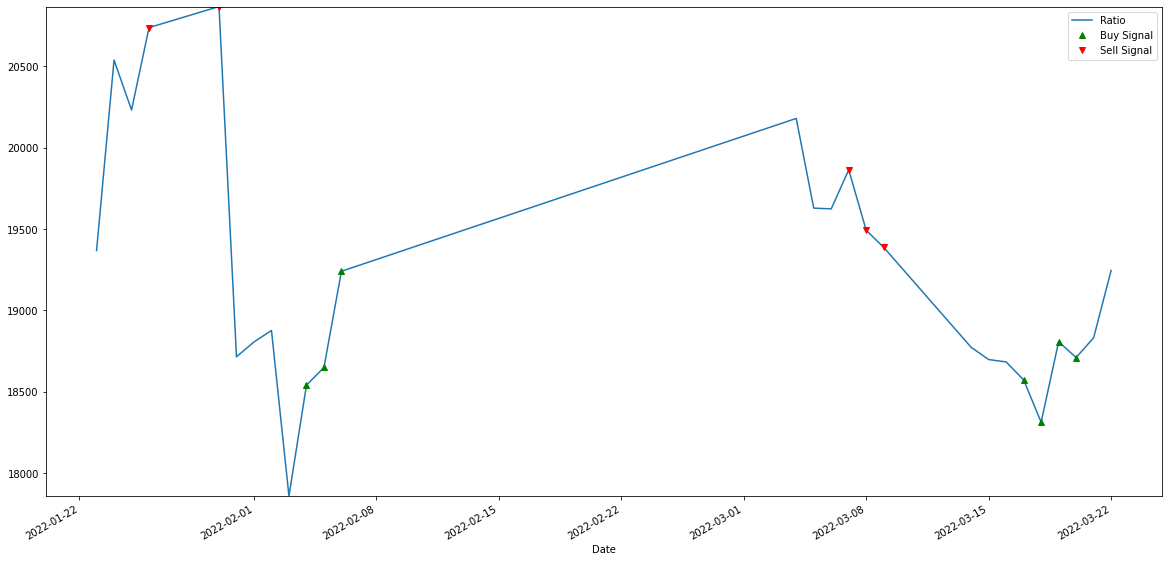

In [307]:
#Plota os ratios para sinais de compra e venda baseados no z-score
plt.figure(figsize=(20, 10))

train[10:].plot()

buy = train.copy()
sell = train.copy()

buy[zscore_60_5 > -1] = 0 #deixar igual a zero
sell[zscore_60_5 < 1] = 0

buy[10:].plot(color= 'g', linestyle='None', marker= '^')
sell[10:].plot(color= 'r', linestyle='None', marker='v')

x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2, ratios.min(),ratios.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.show()

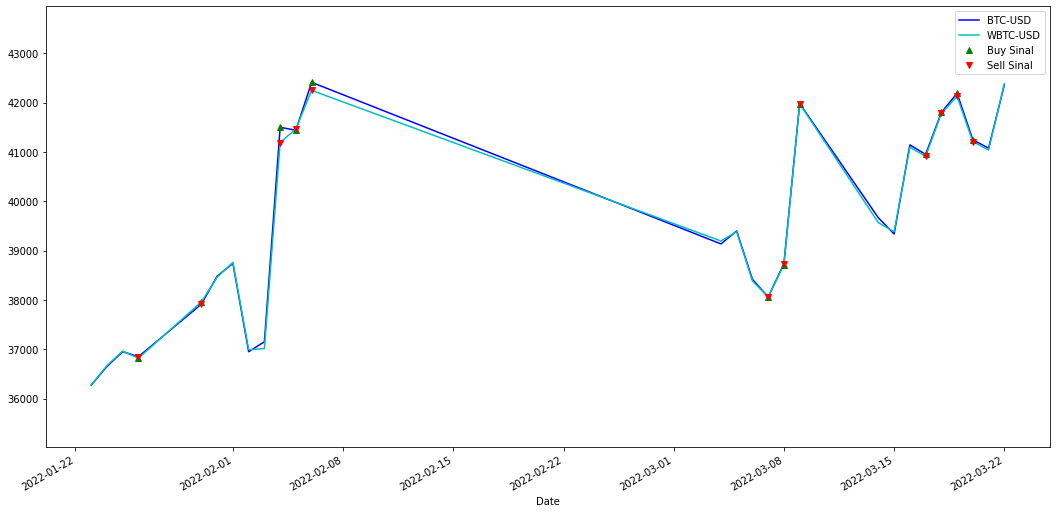

In [314]:
#Plot os preços de compra e venda para os sinais de z-score
plt.figure(figsize=(18,9))

par = pairs[0]
qnt = 700
S1 = data[par[0]].iloc[:qnt]
S2 = data[par[1]].iloc[:qnt]
S1[10:].plot(color='b')
S2[10:].plot(color='c')
buyR = 0*S1.copy()
sellR = 0*S1.copy()
                  
#when buying the ratio, buy S1 and sell S2
buyR[buy!=0]= S1[buy!=0]
sellR[buy!=0]=S2[buy!=0]
#when selling the ratio, sell s1 and buy S2
buyR[sell!=0]=S2[sell!=0]
sellR[sell!=0]=S1[sell!=0]

buyR[10:].plot(color='g', linestyle='None', marker= '^')
sellR[10:].plot(color='r', linestyle= 'None', marker='v')

x1,x2, y1,y2 = plt.axis()
plt.axis((x1,x2,min(S1.min(),S2.min()), max(S1.max(), S2.max())))

plt.legend([par[0], par[1], 'Buy Sinal', 'Sell Sinal'])
plt.show()

